### <font color='blue'> Clusterização de Clientes em E-commerce

##### Demanda:

O objetivo é identificar padrões de comportamento entre os clientes da Olist Store. Por meio da clusterização, buscamos agrupar clientes com características semelhantes para que possamos entender melhor seus comportamentos e preferências.

Com esta demanda, realizamos uma análise de segmentação para encontrar padrões nos seguintes aspectos:

1 - Total de Compras <br>
2 - Tempo médio de entrega <br>
3 - Valor médio do frete <br>
4 - Quantidade de dias que o cliente não compra <br>
5 - Tempo gasto por cada cliente <br>
6 - Revisão média por cada cliente <br>
7 - Número médio de parcelas por cada cliente <br>

##### Descrição do Projeto:
- Carregar e Inspecionar os Dados
- Limpeza de Dados
- Seleção das Variáveis ​​de Interesse
- Pré-processamento dos Dados
- Análise Exploratória para as distribuições das variáveis ​​selecionadas.
- Identificar possíveis outliers nos dados.
- Determinação do Número de Clusters com método do cotovelo (Elbow Method)
- Aplicação do Algoritmo K-means:
- Avaliação dos Clusters:
- Interpretação e Análise dos Resultados

##### Importar os Pacotes

In [ ]:
import pandas as pd
import numpy as np 
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Configurar para não exibir warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Configurar para exibir todas as colunas de um DataFrame do Pandas
pd.set_option('display.max_columns', None)

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Projeto Cluster" --iversions

Author: Projeto Cluster

missingno : 0.5.2
matplotlib: 3.10.0
pandas    : 2.2.3
seaborn   : 0.13.2
numpy     : 1.26.4



##### Carregar os Dados

In [ ]:
clientes = pd.read_csv('C:/Users/Fernanda Pavan/GitHub/Projeto_Cluster_Clientes/olist_customers_dataset.csv')
pedidos = pd.read_csv('C:/Users/Fernanda Pavan/GitHub/Projeto_Cluster_Clientes/olist_orders_dataset.csv')
reviews = pd.read_csv('C:/Users/Fernanda Pavan/GitHub/Projeto_Cluster_Clientes/olist_order_reviews_dataset.csv')
pagamentos = pd.read_csv('C:/Users/Fernanda Pavan/GitHub/Projeto_Cluster_Clientes/olist_order_payments_dataset.csv')
itens_pedidos = pd.read_csv('C:/Users/Fernanda Pavan/GitHub/Projeto_Cluster_Clientes/olist_order_items_dataset.csv')

In [ ]:
# Transformando as bases em apenas 1 dataframe

df1 = pd.merge(clientes, pedidos, on = 'customer_id')
df2 = pd.merge(df1, reviews, on = 'order_id')
df3 = pd.merge(df2, pagamentos, on = 'order_id')
df4 = pd.merge(df3, itens_pedidos, on = 'order_id')

In [ ]:
# Verificando o Tipo de cada variável
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   customer_unique_id             117329 non-null  object 
 2   customer_zip_code_prefix       117329 non-null  int64  
 3   customer_city                  117329 non-null  object 
 4   customer_state                 117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_status                   117329 non-null  object 
 7   order_purchase_timestamp       117329 non-null  object 
 8   order_approved_at              117314 non-null  object 
 9   order_delivered_carrier_date   116094 non-null  object 
 10  order_delivered_customer_date  114858 non-null  object 
 11  order_estimated_delivery_date  117329 non-null  object 
 12  review_id                     

In [ ]:
# Cópia do dataset
df = df4.copy()

In [ ]:
# Renomear as variáveis para português

df = df.rename(columns={'customer_id': 'id_cliente',
                        'customer_unique_id': 'id_unico_cliente',                        
                        'customer_zip_code_prefix': 'prefixo_codigo_postal_cliente',            
                        'customer_city': 'cidade_cliente',                        
                        'customer_state': 'estado_cliente',                        
                        'order_id': 'id_pedido',                        
                        'order_status': 'status_pedido',                        
                        'order_purchase_timestamp': 'data_hora_compra',                        
                        'order_approved_at':'data_hora_pedido_aprovado',                        
                        'order_delivered_carrier_date':'data_entrega_transportador',                        
                        'order_delivered_customer_date':'data_entrega_cliente',                        
                        'order_estimated_delivery_date':'data_estimativa_entrega',                        
                        'review_id':'id_avaliacao',                        
                        'review_score':'pontuacao_avaliacao',                        
                        'review_comment_title':'titulo_comentario_avaliacao',                        
                        'review_comment_message':'mensagem_comentario_avaliacao',                        
                        'review_creation_date':'data_criacao_avaliacao',                        
                        'review_answer_timestamp':'data_hora_resposta_avaliacao', 
                        'payment_sequential':'pagamento_sequencial',
                        'payment_type':'tipo_pagamento',
                        'payment_installments':'parcelas_pagamento',
                        'payment_value':'valor_pagamento',
                        'order_item_id':'id_item_pedido',                        
                        'product_id':'id_produto',                        
                        'seller_id':'id_vendedor',                        
                        'shipping_limit_date':'data_limite_envio',
                        'price':'preco',
                        'freight_value':'valor_frete'})

In [ ]:
df.columns

Index(['id_cliente', 'id_unico_cliente', 'prefixo_codigo_postal_cliente',
       'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido',
       'data_hora_compra', 'data_hora_pedido_aprovado',
       'data_entrega_transportador', 'data_entrega_cliente',
       'data_estimativa_entrega', 'id_avaliacao', 'pontuacao_avaliacao',
       'titulo_comentario_avaliacao', 'mensagem_comentario_avaliacao',
       'data_criacao_avaliacao', 'data_hora_resposta_avaliacao',
       'pagamento_sequencial', 'tipo_pagamento', 'parcelas_pagamento',
       'valor_pagamento', 'id_item_pedido', 'id_produto', 'id_vendedor',
       'data_limite_envio', 'preco', 'valor_frete'],
      dtype='object')

#### Criando variáveis auxiliares:

1. Total de Compras (total_compras_por_cliente)
2. Tempo médio de entrega (tempo_medio_entrega)
3. Valor médio do frete (avg_freight_value)
4. Quantidade de dias que o cliente não compra (pedido_tempo_de_data_de_compra | dias_desde_a_última_compra)
5. Tempo gasto por cada cliente (total_gasto)
6. Review médio por cada cliente (media_review_score)
7. Numero médio de parcelas por cada cliente (resumo_comportamento_parcelamento) 

In [ ]:
# Total de compras

total_compras_por_cliente = df.groupby('id_unico_cliente')['id_pedido'].nunique().reset_index()
total_compras_por_cliente.columns = ['id_unico_cliente', 'total_compras']

df = pd.merge(df, total_compras_por_cliente, on = 'id_unico_cliente')

df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido     data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered  2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered  2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered  2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered  2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered  2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab  

In [ ]:
# Tempo médio de entrega

df['tempo_medio_entrega'] = (pd.to_datetime(df['data_entrega_cliente']) - pd.to_datetime(df['data_hora_compra'])).dt.days
df['tempo_medio_entrega'] = df.groupby('id_unico_cliente')['tempo_medio_entrega'].transform('mean')

df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido     data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered  2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered  2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered  2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered  2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered  2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab  

In [ ]:
# Valor médio do frete

df['valor_medio_frete'] = df.groupby('id_unico_cliente')['valor_frete'].transform('mean')
df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido     data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered  2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered  2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered  2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered  2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered  2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab  

In [ ]:
# Quantidade de dias que o cliente não compra

df['data_hora_compra'] = pd.to_datetime(df['data_hora_compra'])

df['dias_desde_ultima_compra'] = (df['data_hora_compra'].max() - df.groupby('id_unico_cliente')['data_hora_compra'].transform('max')).dt.days

df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido    data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered 2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered 2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered 2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered 2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered 2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a

In [ ]:
# Total Gasto por cada cliente

total_gasto = df.groupby('id_unico_cliente')['valor_pagamento'].sum().reset_index()
total_gasto.columns = ['id_unico_cliente', 'total_gasto']

df = pd.merge(df, total_gasto, on = 'id_unico_cliente')

df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido    data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered 2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered 2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered 2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered 2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered 2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a

In [ ]:
# Review médio por cada cliente

media_review_score = df.groupby('id_unico_cliente')['pontuacao_avaliacao'].mean().reset_index()
media_review_score.columns = ['id_unico_cliente', 'media_pontuacao_score']

df = pd.merge(df, media_review_score, on = 'id_unico_cliente')

df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido    data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered 2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered 2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered 2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered 2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered 2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a

In [ ]:
# Numero médio de parcelas por cada cliente

resumo_comportamento_parcelamento = df.groupby('id_unico_cliente')['parcelas_pagamento'].mean().reset_index()
resumo_comportamento_parcelamento.columns = ['id_unico_cliente', 'media_parcelas']

df = pd.merge(df, resumo_comportamento_parcelamento, on = 'id_unico_cliente') 
df.head()

id_cliente                  id_unico_cliente  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   prefixo_codigo_postal_cliente         cidade_cliente estado_cliente  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   

                          id_pedido status_pedido    data_hora_compra  \
0  00e7ee1b050b8499577073aeb2a297a1     delivered 2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7     delivered 2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2     delivered 2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba     delivered 2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f     delivered 2018-07-29 09:51:30   

  data_hora_pedido_aprovado data_entrega_transportador data_entrega_cliente  \
0       2017-05-16 15:22:12        2017-05-23 10:47:57  2017-05-25 10:35:35   
1       2018-01-12 20:58:32        2018-01-15 17:14:59  2018-01-29 12:41:19   
2       2018-05-20 16:19:10        2018-06-11 14:31:00  2018-06-14 17:58:51   
3       2018-03-13 17:29:19        2018-03-27 23:22:42  2018-03-28 16:04:25   
4       2018-07-29 10:10:09        2018-07-30 15:16:00  2018-08-09 20:55:48   

  data_estimativa_entrega                      id_avaliacao  \
0     2017-06-05 00:00:00  88b8b52d46df026a9d1ad2136a59b30b   
1     2018-02-06 00:00:00  02fc48a9efa3e3d0f1a8ea26507eeec3   
2     2018-06-13 00:00:00  5ad6695d76ee186dc473c42706984d87   
3     2018-04-10 00:00:00  059a801bb31f6aab2266e672cab87bc5   
4     2018-08-15 00:00:00  8490879d58d6c5d7773f2739a03f089a   

   pontuacao_avaliacao titulo_comentario_avaliacao  \
0                    4                         NaN   
1                    5                         NaN   
2                    5                         NaN   
3                    5                         NaN   
4                    5               a melhor nota   

                   mensagem_comentario_avaliacao data_criacao_avaliacao  \
0                                            NaN    2017-05-26 00:00:00   
1                                            NaN    2018-01-30 00:00:00   
2                                            NaN    2018-06-15 00:00:00   
3                                            NaN    2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon    2018-08-10 00:00:00   

  data_hora_resposta_avaliacao  pagamento_sequencial tipo_pagamento  \
0          2017-05-30 22:34:40                     1    credit_card   
1          2018-02-10 22:43:29                     1    credit_card   
2          2018-06-15 12:10:59                     1    credit_card   
3          2018-04-02 18:36:47                     1    credit_card   
4          2018-08-17 01:59:52                     1    credit_card   

   parcelas_pagamento  valor_pagamento  id_item_pedido  \
0                   2           146.87               1   
1                   8           335.48               1   
2                   7           157.73               1   
3                   1           173.30               1   
4                   8           252.25               1   

                         id_produto                       id_vendedor  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a

#### Removendo variáveis desnecessária

In [ ]:
colunas_para_remover = [
    'id_cliente', 'prefixo_codigo_postal_cliente', 'cidade_cliente', 'estado_cliente', 
    'id_pedido', 'status_pedido', 'data_hora_compra', 'data_hora_pedido_aprovado', 
    'data_entrega_transportador', 'data_entrega_cliente', 'data_estimativa_entrega', 
    'id_avaliacao', 'pontuacao_avaliacao', 'titulo_comentario_avaliacao', 
    'mensagem_comentario_avaliacao', 'data_criacao_avaliacao', 'data_hora_resposta_avaliacao', 
    'pagamento_sequencial', 'tipo_pagamento', 'parcelas_pagamento', 'valor_pagamento', 
    'id_item_pedido', 'id_produto', 'id_vendedor', 'data_limite_envio', 'preco', 'valor_frete'
]

df.drop(columns=colunas_para_remover, inplace=True)

df.head()


id_unico_cliente  total_compras  tempo_medio_entrega  \
0  861eff4711a542e4b93843c6dd7febb0              1                  8.0   
1  290c77bc529b7ac935b93aa66c333dc3              1                 16.0   
2  060e732b5b29e8181a18229c7b0b2b5e              1                 26.0   
3  259dac757896d24d7702b9acbbff3f3c              1                 14.0   
4  345ecd01c38d18a9036ed96c73b8d066              1                 11.0   

   valor_medio_frete  dias_desde_ultima_compra  total_gasto  \
0              21.88                       474       146.87   
1              46.48                       233       335.48   
2              17.79                       106       157.73   
3              23.36                       173       173.30   
4              22.25                        35       252.25   

   media_pontuacao_score  media_parcelas  
0                    4.0             2.0  
1                    5.0             8.0  
2                    5.0             7.0  
3                    5.0             1.0  
4                    5.0             8.0

In [ ]:
# Estatísticas descritivas do dataset

df.describe()

total_compras  tempo_medio_entrega  valor_medio_frete  \
count  117329.000000        115004.000000      117329.000000   
mean        1.088512            11.980265          20.027514   
std         0.399972             9.299777          15.498882   
min         1.000000             0.000000           0.000000   
25%         1.000000             6.000000          13.230000   
50%         1.000000            10.000000          16.320000   
75%         1.000000            15.000000          21.140000   
max        16.000000           208.000000         409.680000   

       dias_desde_ultima_compra    total_gasto  media_pontuacao_score  \
count             117329.000000  117329.000000          117329.000000   
mean                 243.210869     376.458888               4.031467   
std                  153.146176    1574.501647               1.374028   
min                    0.000000       9.590000               1.000000   
25%                  119.000000      70.540000               3.685714   
50%                  223.000000     134.900000               5.000000   
75%                  352.000000     282.400000               5.000000   
max                  728.000000  109312.640000               5.000000   

       media_parcelas  
count   117329.000000  
mean         2.940151  
std          2.735093  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          4.000000  
max         24.000000

In [ ]:
# Verificação de valores nulos

valores_nulos = df.isnull().sum()
valores_nulos_df = pd.DataFrame({'Variavel':valores_nulos.index, 'Quantidade de Valores Nulos':valores_nulos.values})
valores_nulos_df

Variavel  Quantidade de Valores Nulos
0          id_unico_cliente                            0
1             total_compras                            0
2       tempo_medio_entrega                         2325
3         valor_medio_frete                            0
4  dias_desde_ultima_compra                            0
5               total_gasto                            0
6     media_pontuacao_score                            0
7            media_parcelas                            0

<Axes: >

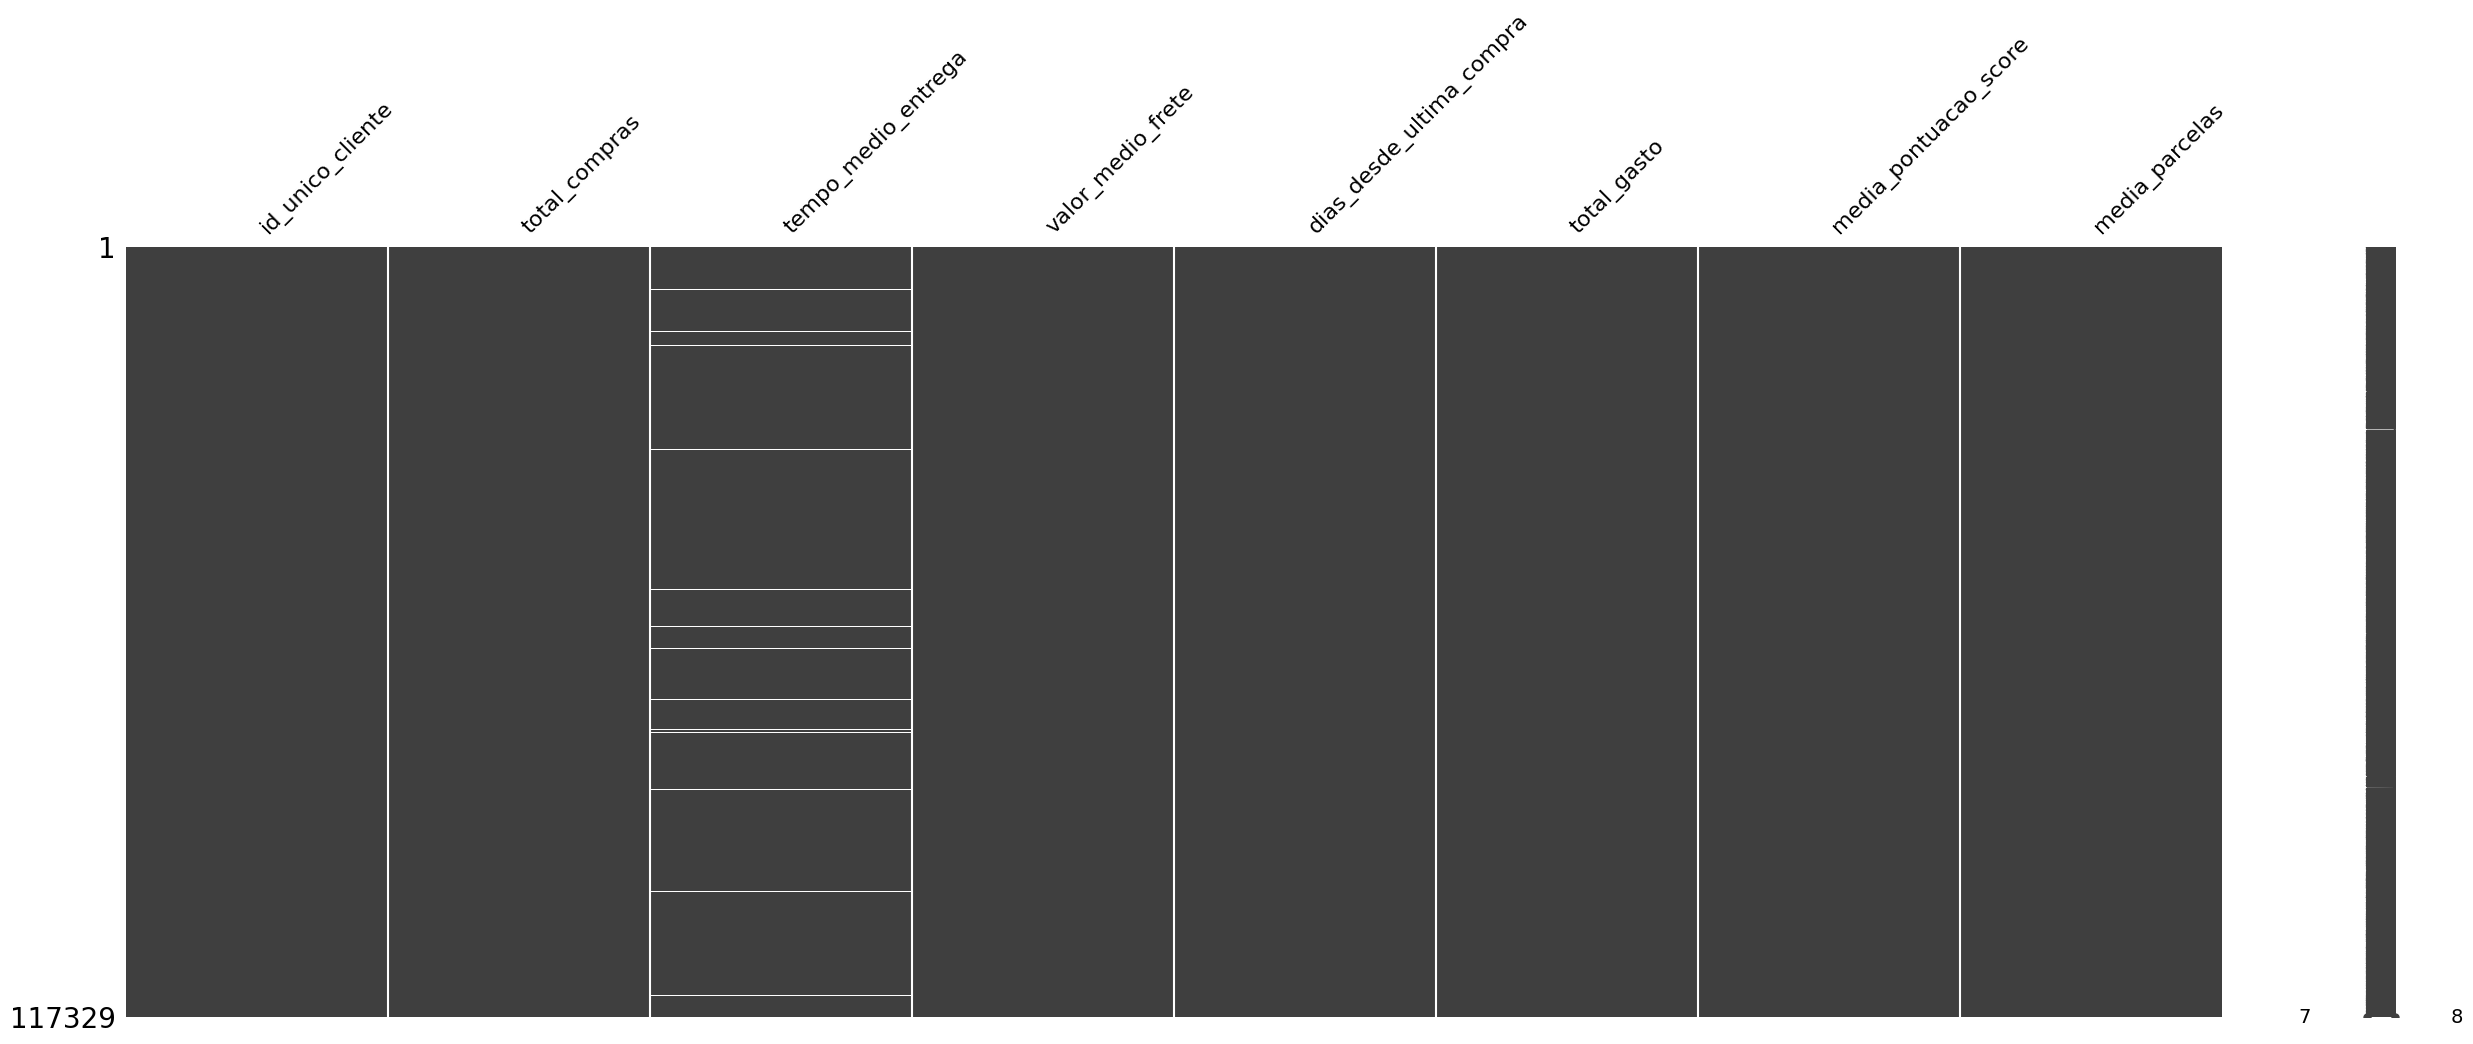

In [ ]:
# Visualização gráfica dos dados faltantes por coluna
missingno.matrix(df, figsize = (30, 10))

In [ ]:
# Verificando duplicatas

df[df.duplicated()]

id_unico_cliente  total_compras  tempo_medio_entrega  \
21      a96d5cfa0d3181817e2b946f921ea021              1            10.000000   
22      a96d5cfa0d3181817e2b946f921ea021              1            10.000000   
35      e079b18794454de9d2be5c12b4392294              2            13.666667   
37      ef07ba9aa5226f77264ffa5762b2280b              1            10.000000   
49      d251c190ca75786e9ab937982d60d1d4              1             8.000000   
...                                  ...            ...                  ...   
117302  b96d6a178adbabf269fd843b37327798              1            14.000000   
117311  4452b8ef472646c4cc042cb31a291f3b              1             9.000000   
117312  4452b8ef472646c4cc042cb31a291f3b              1             9.000000   
117316  82d46759af0369aad49084bacf85a6c3              1            35.000000   
117321  e7f8760e2bbd2f1986bebd99596c088e              1            20.000000   

        valor_medio_frete  dias_desde_ultima_compra  total_gasto  \
21                 17.670                       322       698.13   
22                 17.670                       322       698.13   
35                 16.655                       445      1482.62   
37                 15.230                       174        45.73   
49                 13.470                       137       101.84   
...                   ...                       ...          ...   
117302             14.100                       222       176.00   
117311             12.480                       282        32.38   
117312             12.480                       282        32.38   
117316             31.930                       292       199.92   
117321             24.420                       536        84.32   

        media_pontuacao_score  media_parcelas  
21                        1.0             2.0  
22                        1.0             2.0  
35                        5.0             8.0  
37                        5.0             1.0  
49                        2.0             1.0  
...                       ...             ...  
117302                    5.0             4.5  
117311                    4.0             1.0  
117312                    4.0             1.0  
117316                    1.0             3.0  
117321                    3.0             1.0  

[22609 rows x 8 columns]

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0 to 117328
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_unico_cliente          94720 non-null  object 
 1   total_compras             94720 non-null  int64  
 2   tempo_medio_entrega       92752 non-null  float64
 3   valor_medio_frete         94720 non-null  float64
 4   dias_desde_ultima_compra  94720 non-null  int64  
 5   total_gasto               94720 non-null  float64
 6   media_pontuacao_score     94720 non-null  float64
 7   media_parcelas            94720 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.5+ MB


In [ ]:
# Tratar dados faltantes da coluna tempo_medio_entrega
df['tempo_medio_entrega'].fillna(df['tempo_medio_entrega'].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0 to 117328
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_unico_cliente          94720 non-null  object 
 1   total_compras             94720 non-null  int64  
 2   tempo_medio_entrega       94720 non-null  float64
 3   valor_medio_frete         94720 non-null  float64
 4   dias_desde_ultima_compra  94720 non-null  int64  
 5   total_gasto               94720 non-null  float64
 6   media_pontuacao_score     94720 non-null  float64
 7   media_parcelas            94720 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.5+ MB


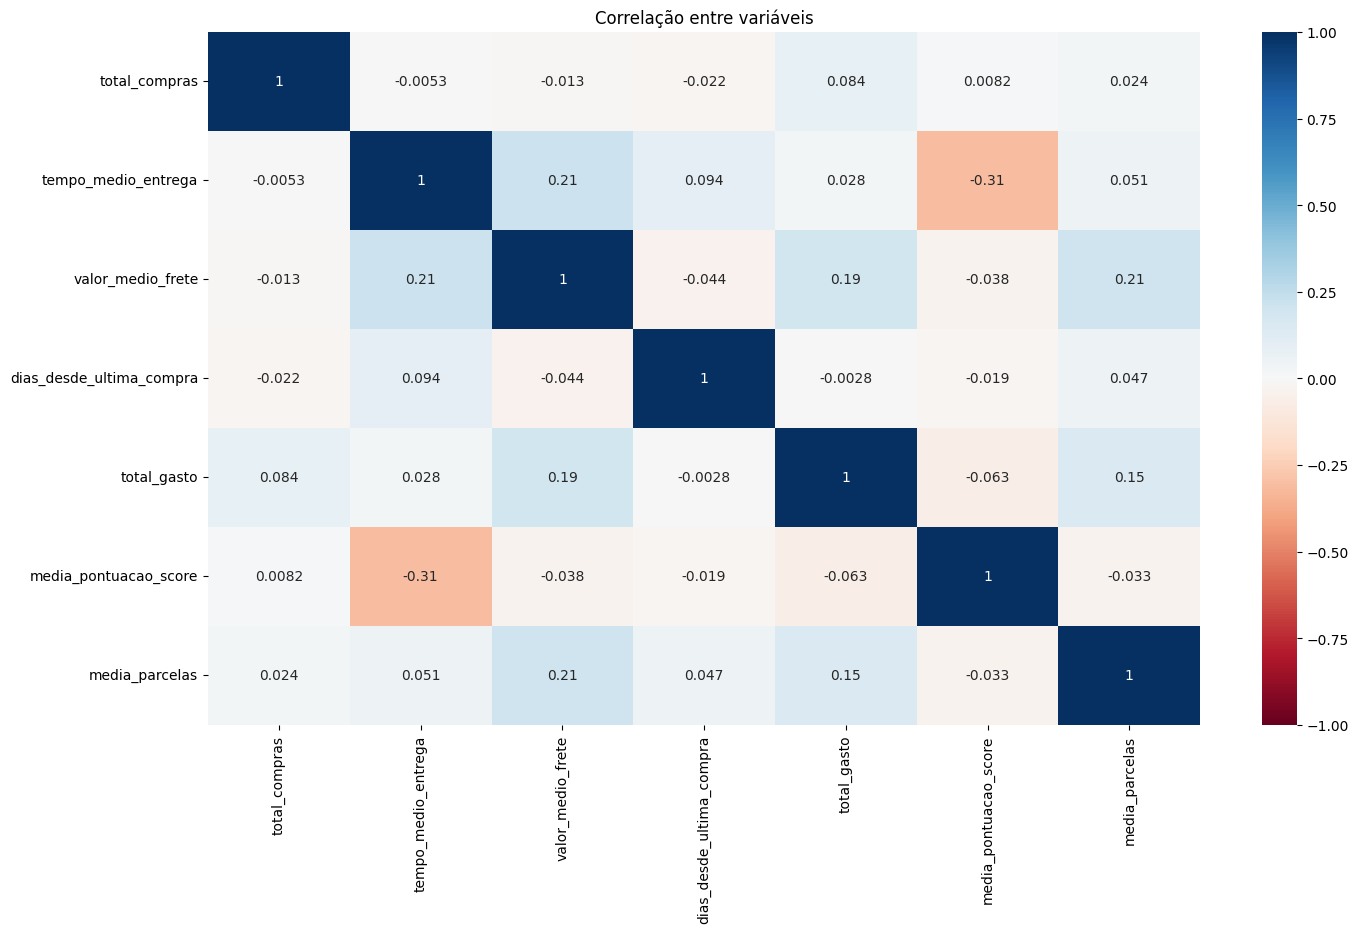

In [ ]:
# Correlação entre variáveis

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(16,9))
plt.title("Correlação entre variáveis")
sns.heatmap(df_numeric.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show()

In [ ]:
# Aplicando Scaler na base de dados

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 1:8])

### Cluster com K-means

#### Definindo o número de clusters

#### Modelando

In [ ]:
kmeans = KMeans(n_clusters = 5, n_init = 10, init='random', max_iter = 300)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10)

In [ ]:
df_Kmeans = df.copy()
df_Kmeans.drop(columns = 'id_unico_cliente', axis=1, inplace=True)
df_Kmeans.head()

total_compras  tempo_medio_entrega  valor_medio_frete  \
0              1                  8.0              21.88   
1              1                 16.0              46.48   
2              1                 26.0              17.79   
3              1                 14.0              23.36   
4              1                 11.0              22.25   

   dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
0                       474       146.87                    4.0   
1                       233       335.48                    5.0   
2                       106       157.73                    5.0   
3                       173       173.30                    5.0   
4                        35       252.25                    5.0   

   media_parcelas  
0             2.0  
1             8.0  
2             7.0  
3             1.0  
4             8.0

In [ ]:
df_Kmeans['cluster'].value_counts()

cluster
0    36917
4    28093
3    14161
2    12681
1     2868
Name: count, dtype: int64

In [ ]:
df_Kmeans['cluster'] = kmeans.labels_
df_Kmeans.head()

total_compras  tempo_medio_entrega  valor_medio_frete  \
0              1                  8.0              21.88   
1              1                 16.0              46.48   
2              1                 26.0              17.79   
3              1                 14.0              23.36   
4              1                 11.0              22.25   

   dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
0                       474       146.87                    4.0   
1                       233       335.48                    5.0   
2                       106       157.73                    5.0   
3                       173       173.30                    5.0   
4                        35       252.25                    5.0   

   media_parcelas  cluster  
0             2.0        4  
1             8.0        2  
2             7.0        2  
3             1.0        0  
4             8.0        2

In [ ]:
df_Kmeans.groupby('cluster').mean()

total_compras  tempo_medio_entrega  valor_medio_frete  \
cluster                                                          
0             1.000000             9.195628          17.295970   
1             2.114017            11.796174          18.956621   
2             1.000079            12.579844          35.416424   
3             1.000000            21.101688          20.531007   
4             1.000000            10.917987          17.184697   

         dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
cluster                                                                 
0                      126.749330   137.749031               4.635317   
1                      225.459902   486.050432               4.146525   
2                      241.739610   521.678264               4.320085   
3                      241.363039   215.559493               1.543323   
4                      397.054213   143.833518               4.588759   

         media_parcelas  
cluster                  
0              1.872992  
1              3.301061  
2              7.944152  
3              2.583127  
4              2.096922

In [ ]:
df_Kmeans.groupby('cluster').median()

total_compras  tempo_medio_entrega  valor_medio_frete  \
cluster                                                          
0                  1.0             8.000000             15.570   
1                  2.0            10.333333             16.435   
2                  1.0            11.000000             23.240   
3                  1.0            17.000000             17.130   
4                  1.0            10.000000             15.460   

         dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
cluster                                                                 
0                           125.0        93.32               5.000000   
1                           204.0       261.31               4.666667   
2                           228.0       249.61               5.000000   
3                           219.0       119.93               1.000000   
4                           386.0        92.57               5.000000   

         media_parcelas  
cluster                  
0              1.000000  
1              2.333333  
2              8.000000  
3              2.000000  
4              1.000000

In [ ]:
df_Kmeans.groupby('cluster').quantile(0.75)

total_compras  tempo_medio_entrega  valor_medio_frete  \
cluster                                                          
0                  1.0            12.000000            19.5200   
1                  2.0            14.666667            20.6925   
2                  1.0            16.000000            42.6200   
3                  1.0            29.000000            22.2800   
4                  1.0            14.000000            18.0900   

         dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
cluster                                                                 
0                           189.0       157.30                    5.0   
1                           325.0       467.80                    5.0   
2                           350.0       506.88                    5.0   
3                           300.0       220.36                    2.0   
4                           471.0       157.94                    5.0   

         media_parcelas  
cluster                  
0                   2.0  
1                   5.0  
2                  10.0  
3                   4.0  
4                   3.0

3/4 do tempo_medio_entrega demoram ate 29 dias.

#### Análise da variável - Tempo de entrega

In [ ]:
df_Kmeans.nunique()

total_compras                   9
tempo_medio_entrega           369
valor_medio_frete            8761
dias_desde_ultima_compra      613
total_gasto                 30775
media_pontuacao_score          65
media_parcelas                128
cluster                         5
dtype: int64

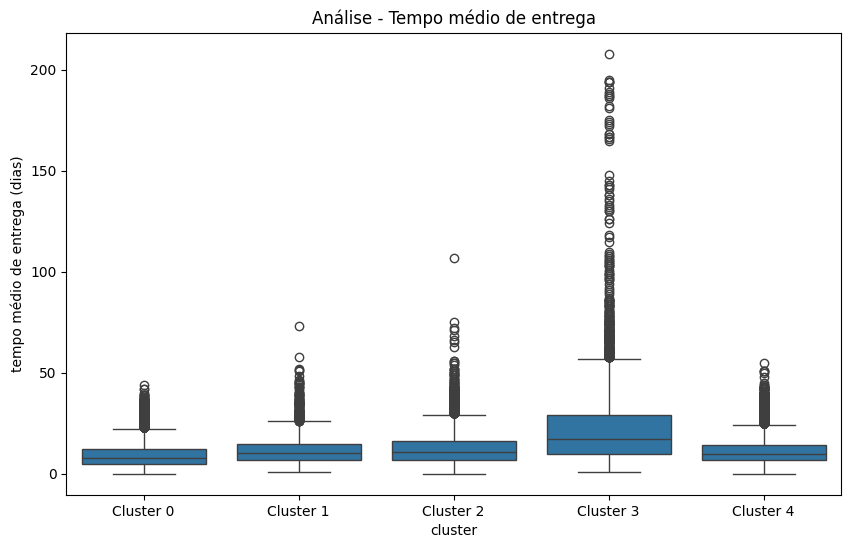

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'cluster', y = 'tempo_medio_entrega', data = df_Kmeans)
plt.xticks(range(5), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title("Análise - Tempo médio de entrega")
plt.ylabel("tempo médio de entrega (dias)")
plt.show()

#### Análise da variável - Dias desde a última compra

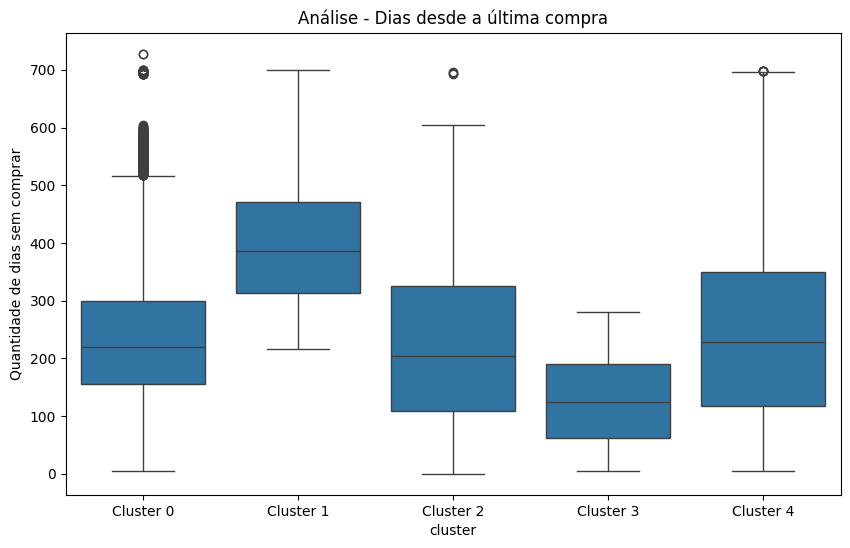

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'cluster', y = 'dias_desde_ultima_compra', data = df_Kmeans)
plt.xticks(range(5), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title("Análise - Dias desde a última compra")
plt.ylabel("Quantidade de dias sem comprar")
plt.show()

#### Análise da variável - Total gasto

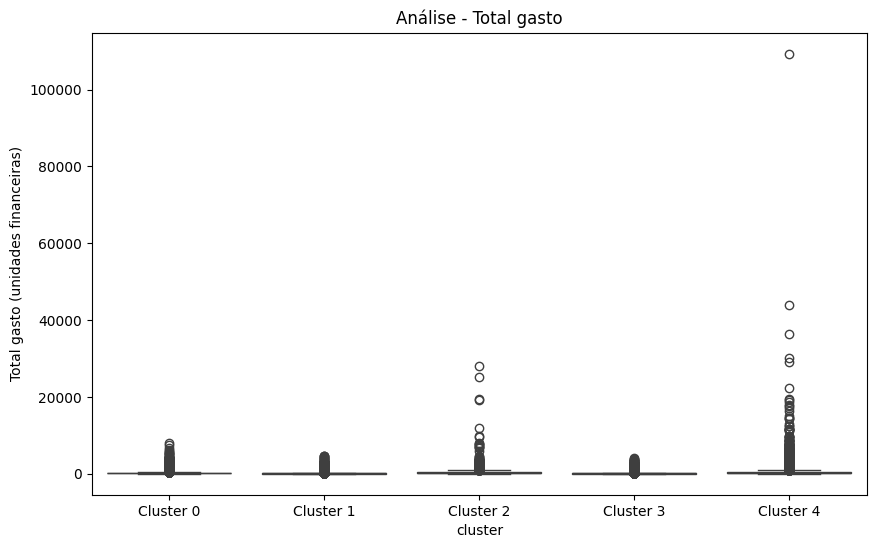

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'cluster', y = 'total_gasto', data = df_Kmeans)
plt.xticks(range(5), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title("Análise - Total gasto")
plt.ylabel("Total gasto (unidades financeiras)")
plt.show()

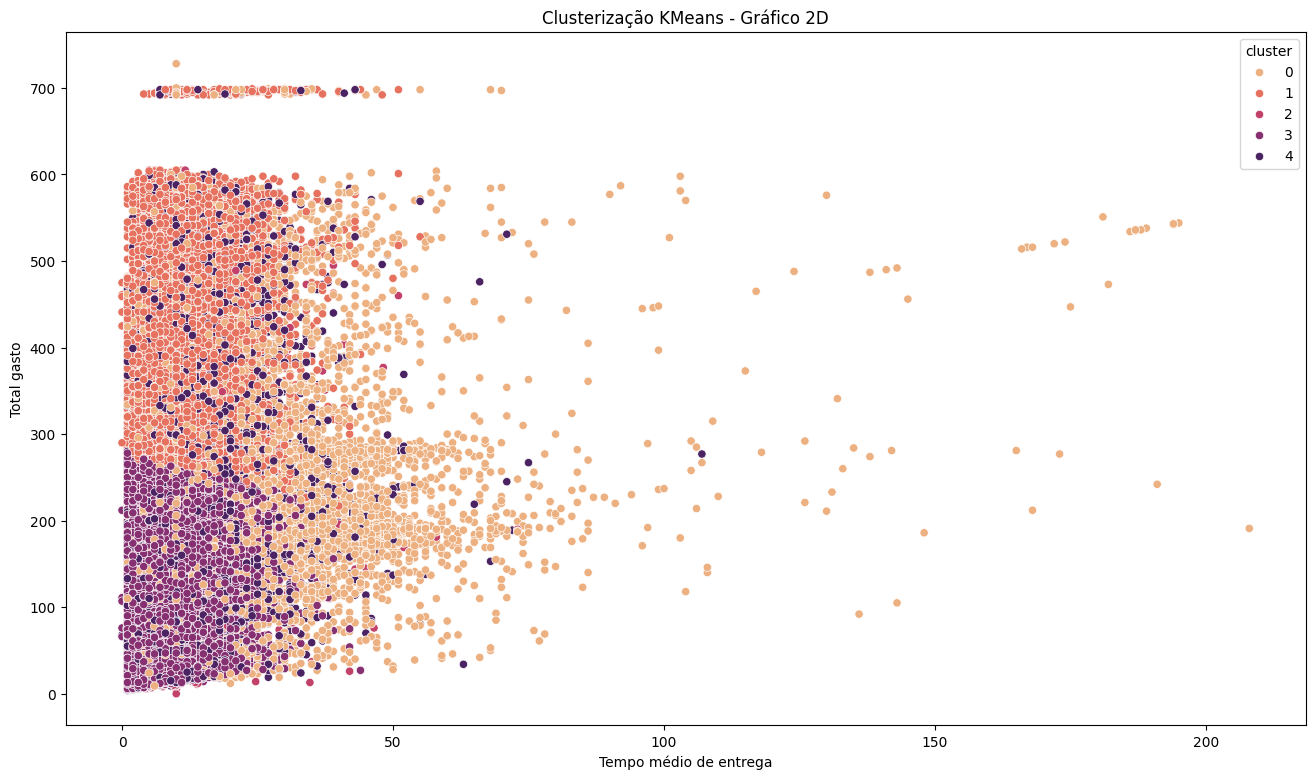

In [ ]:
# Gráfico 2D

plt.figure(figsize=(16,9))
sns.scatterplot(data = df_Kmeans, x = 'tempo_medio_entrega', y = 'dias_desde_ultima_compra', hue = 'cluster', palette = 'flare')

plt.xlabel('Tempo médio de entrega')
plt.ylabel('Total gasto')
plt.title("Clusterização KMeans - Gráfico 2D")
plt.show()

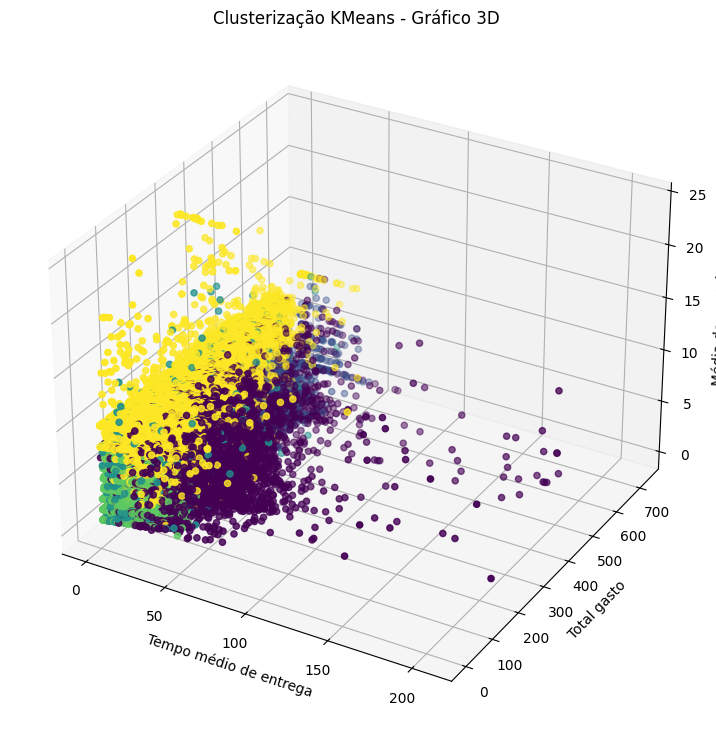

In [ ]:
# Gráfico 3D

fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_Kmeans['tempo_medio_entrega'], df_Kmeans['dias_desde_ultima_compra'], df_Kmeans['media_parcelas'], c = df_Kmeans['cluster'])
ax.set_xlabel("Tempo médio de entrega")
ax.set_ylabel("Total gasto")
ax.set_zlabel('Média de parcelas')
plt.title('Clusterização KMeans - Gráfico 3D')
plt.show()

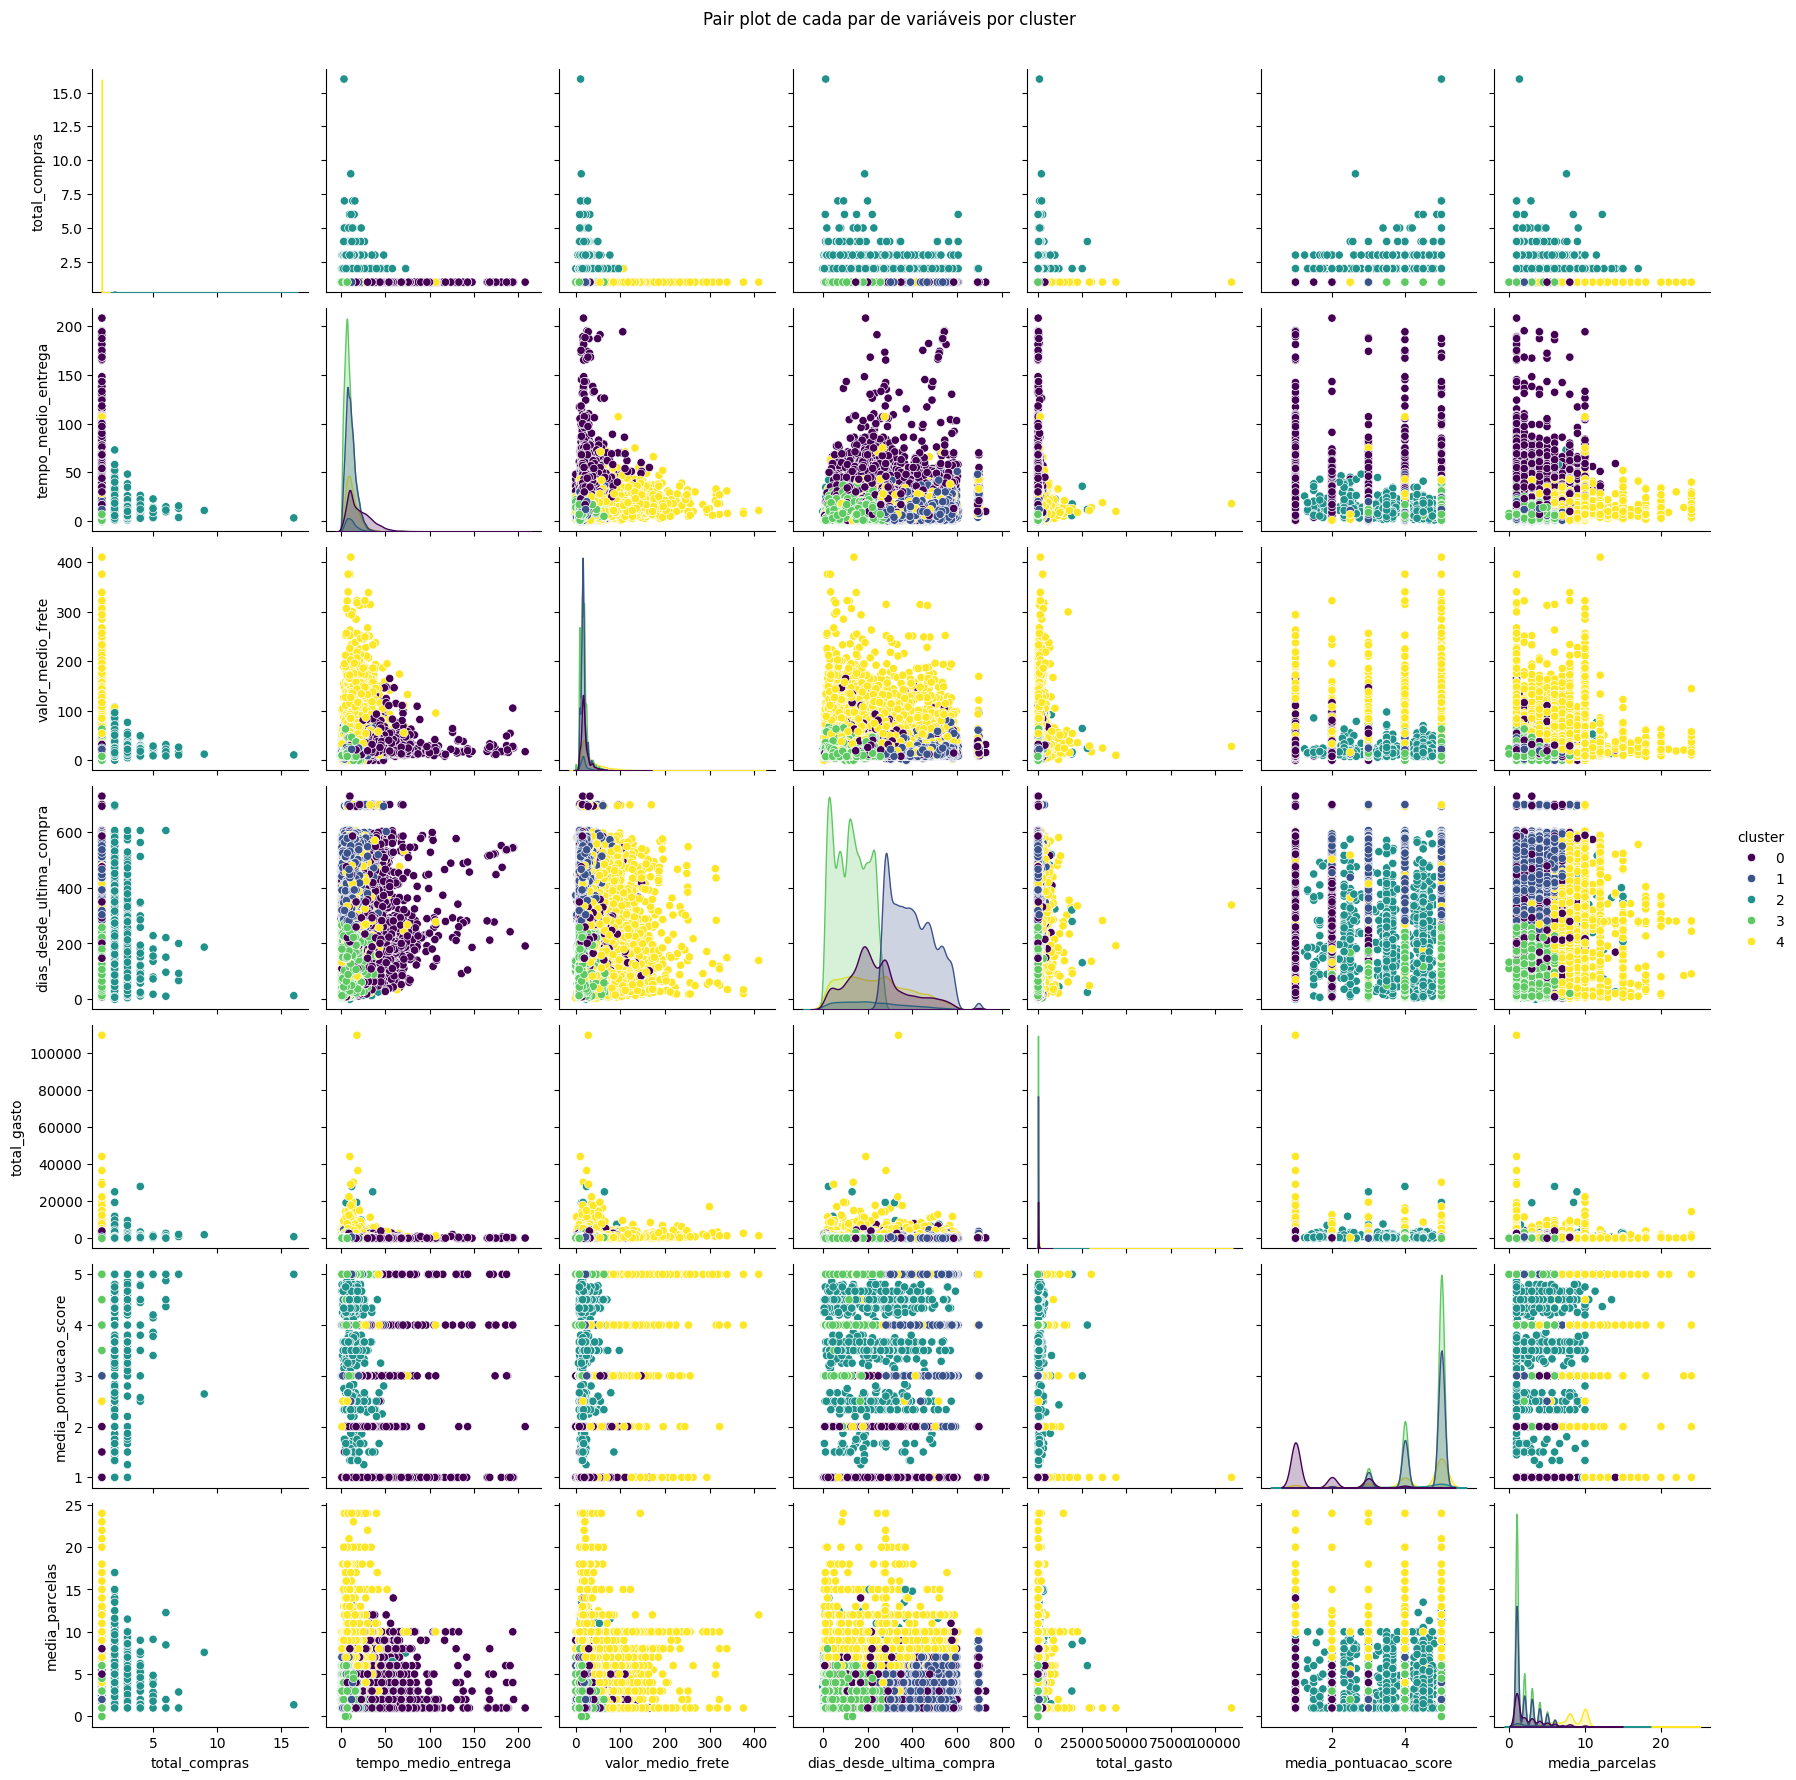

In [ ]:
# Gráfico pairplot

sns.pairplot(df_Kmeans, hue = 'cluster', palette = 'viridis')
plt.suptitle('Pair plot de cada par de variáveis por cluster', y=1.02)
plt.show()

#### K-means com PCA

In [ ]:
pca = PCA()
pca.fit(scaled_features)

PCA()

In [ ]:
# Obtendo a variancia de cada variável e a variância cumulativa

variancia = pca.explained_variance_ratio_

df_variancia = pd.DataFrame(variancia, index = [f'PC{i+1}' for i in range(len(variancia))], columns = ['Variancia Explicada'])
df_variancia_cumulativa = pca.explained_variance_ratio_.cumsum()
df_variancia['Variancia_Cumulativa'] = df_variancia_cumulativa

df_variancia

Variancia Explicada  Variancia_Cumulativa
PC1             0.219081              0.219081
PC2             0.171546              0.390627
PC3             0.145396              0.536023
PC4             0.143310              0.679333
PC5             0.120578              0.799911
PC6             0.115362              0.915273
PC7             0.084727              1.000000

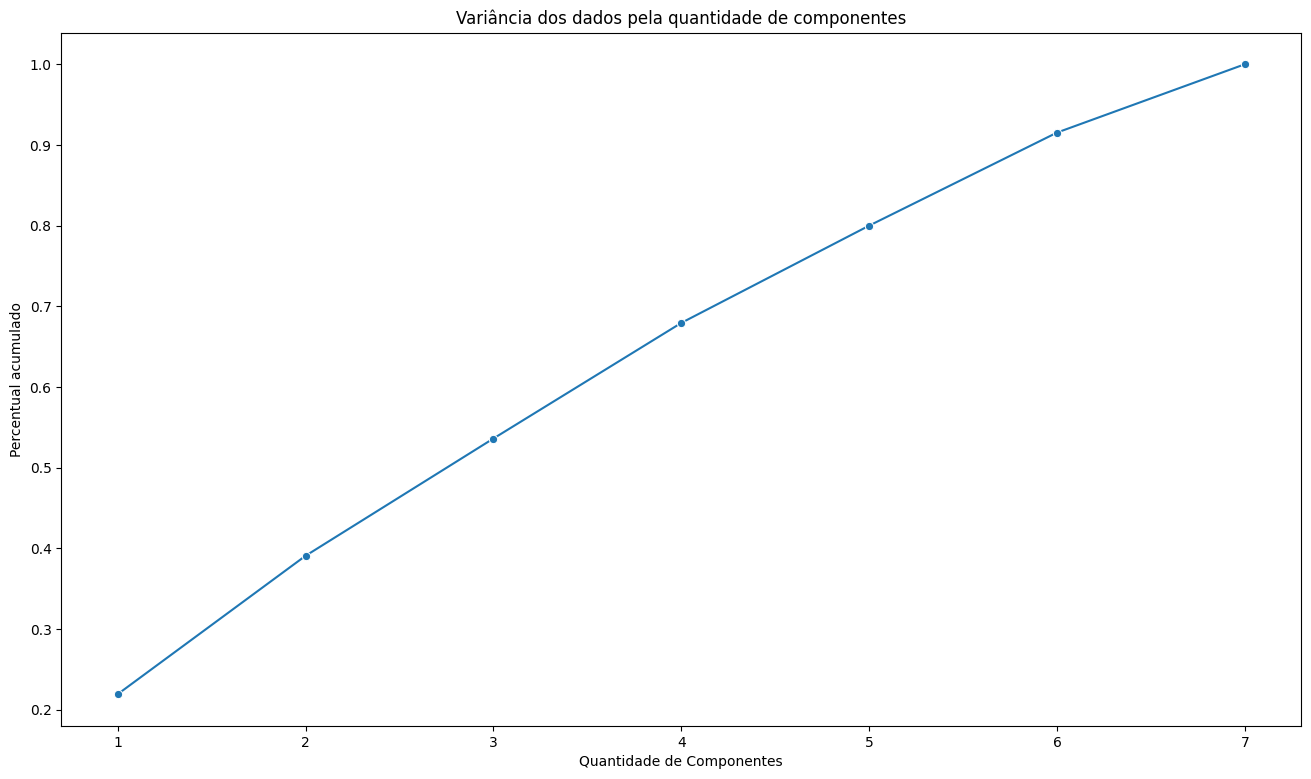

In [ ]:
# Visualizando a variância cumulativa em um gráfico de linha

plt.figure(figsize=(16,9))
sns.lineplot(x = range(1,8), y = df_variancia['Variancia_Cumulativa'], marker = 'o')
plt.title("Variância dos dados pela quantidade de componentes")
plt.xlabel('Quantidade de Componentes')
plt.ylabel('Percentual acumulado')
plt.show()

In [ ]:
pca = PCA(n_components = 5)
pca.fit(scaled_features)

PCA(n_components=5)

In [ ]:
pca.components_

array([[ 0.04887889,  0.51526721,  0.51264385,  0.09344082,  0.3735737 ,
        -0.40876813,  0.39233526],
       [ 0.27100359, -0.4565045 ,  0.26955238, -0.26522475,  0.43400236,
         0.49385563,  0.37802991],
       [ 0.66661667,  0.09931892, -0.14288751, -0.5372124 ,  0.11631819,
        -0.32232855, -0.34542488],
       [ 0.57606226, -0.02865406, -0.31050532,  0.73657458,  0.13016704,
         0.02936417,  0.10280972],
       [-0.36923976, -0.22955485, -0.2769818 ,  0.08064082,  0.7582877 ,
        -0.25429676, -0.29677874]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0 to 117328
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_unico_cliente          94720 non-null  object 
 1   total_compras             94720 non-null  int64  
 2   tempo_medio_entrega       94720 non-null  float64
 3   valor_medio_frete         94720 non-null  float64
 4   dias_desde_ultima_compra  94720 non-null  int64  
 5   total_gasto               94720 non-null  float64
 6   media_pontuacao_score     94720 non-null  float64
 7   media_parcelas            94720 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.5+ MB


In [ ]:
df_comp = pd.DataFrame(data = pca.components_, 
                      columns = df[['total_compras', 'tempo_medio_entrega', 'valor_medio_frete', 'dias_desde_ultima_compra', 'total_gasto', 'media_pontuacao_score', 'media_parcelas']].columns,
                      index = ["Componente 1", "Componente 2", "Componente 3", "Componente 4", "Componente 5"])

df_comp

total_compras  tempo_medio_entrega  valor_medio_frete  \
Componente 1       0.048879             0.515267           0.512644   
Componente 2       0.271004            -0.456504           0.269552   
Componente 3       0.666617             0.099319          -0.142888   
Componente 4       0.576062            -0.028654          -0.310505   
Componente 5      -0.369240            -0.229555          -0.276982   

              dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
Componente 1                  0.093441     0.373574              -0.408768   
Componente 2                 -0.265225     0.434002               0.493856   
Componente 3                 -0.537212     0.116318              -0.322329   
Componente 4                  0.736575     0.130167               0.029364   
Componente 5                  0.080641     0.758288              -0.254297   

              media_parcelas  
Componente 1        0.392335  
Componente 2        0.378030  
Componente 3       -0.345425  
Componente 4        0.102810  
Componente 5       -0.296779

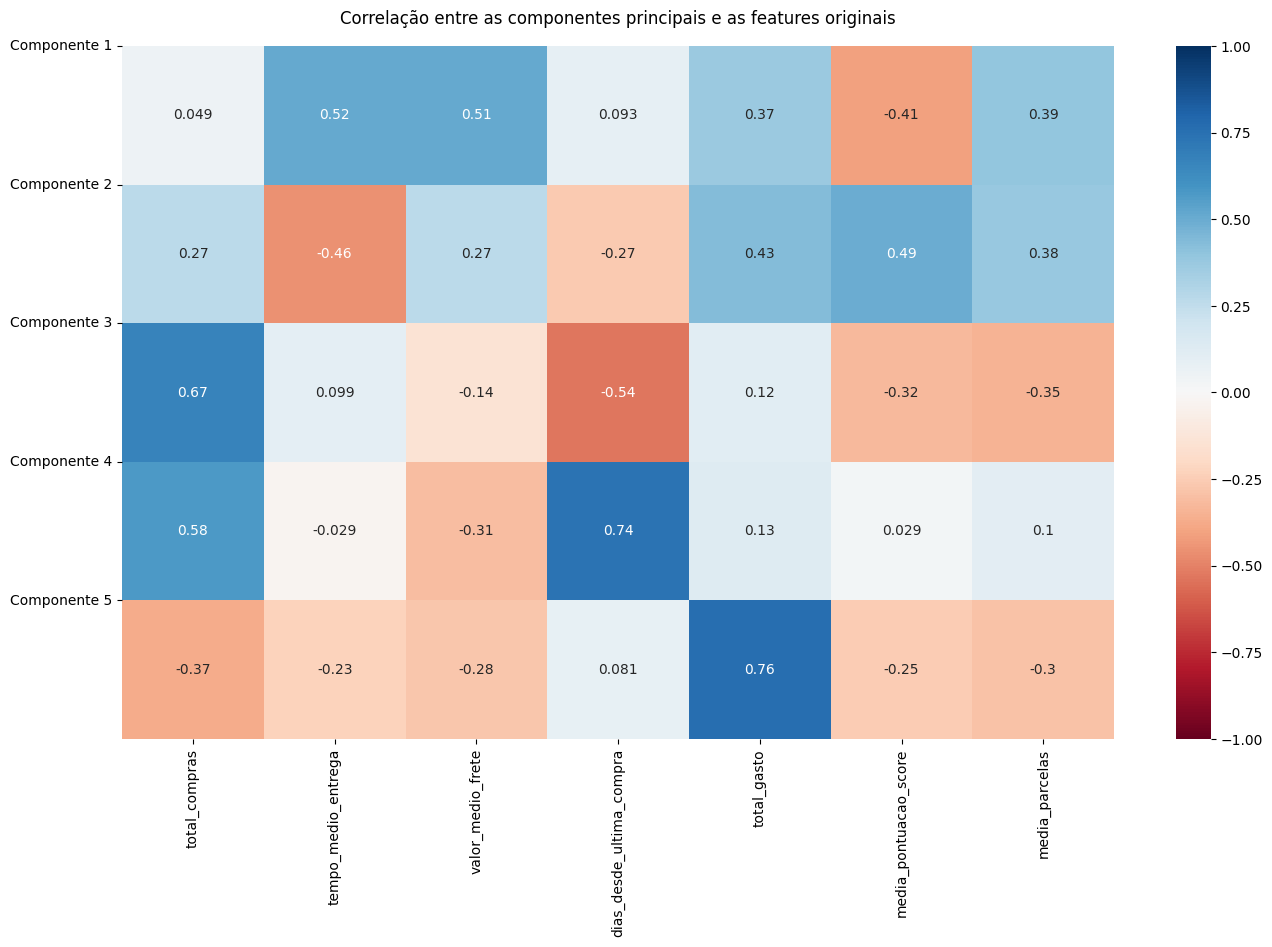

In [ ]:
# Verificando a correlação entre as variáveis originais e as componentes principais

plt.figure(figsize=(16,9))
plt.title("Correlação entre as componentes principais e as features originais", y=1.02)
sns.heatmap(df_comp, annot=True, vmin = -1, vmax = 1, cmap = 'RdBu')

plt.yticks([0, 1, 2 ,3, 4], ["Componente 1", "Componente 2", "Componente 3", "Componente 4", "Componente 5"], rotation = 0)
plt.show()

In [ ]:
# Obtendo as 5 componentes principais

df_pca = pca.transform(scaled_features)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ["Componente 1", "Componente 2", "Componente 3", "Componente 4", "Componente 5"]

In [ ]:
df_pca.head()

Componente 1  Componente 2  Componente 3  Componente 4  Componente 5
0     -0.173701     -0.431485     -0.847628      0.950447      0.290318
1      1.599631      1.364964     -1.122228     -0.424421     -1.093285
2      0.890024      0.345177     -0.215372     -0.577611     -1.005653
3     -0.418501      0.071927      0.149307     -0.555307     -0.090027
4      0.369221      1.481084     -0.277193     -0.902825     -0.750882

#### Calculando erro quadrático para diversos números de clusters

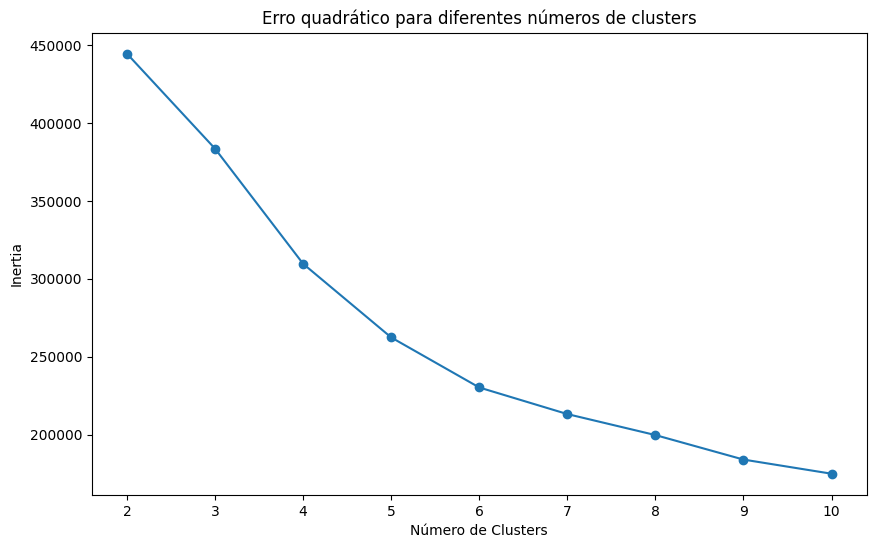

In [ ]:
erro_quadratico = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    erro_quadratico.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), erro_quadratico, marker='o')
plt.title('Erro quadrático para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

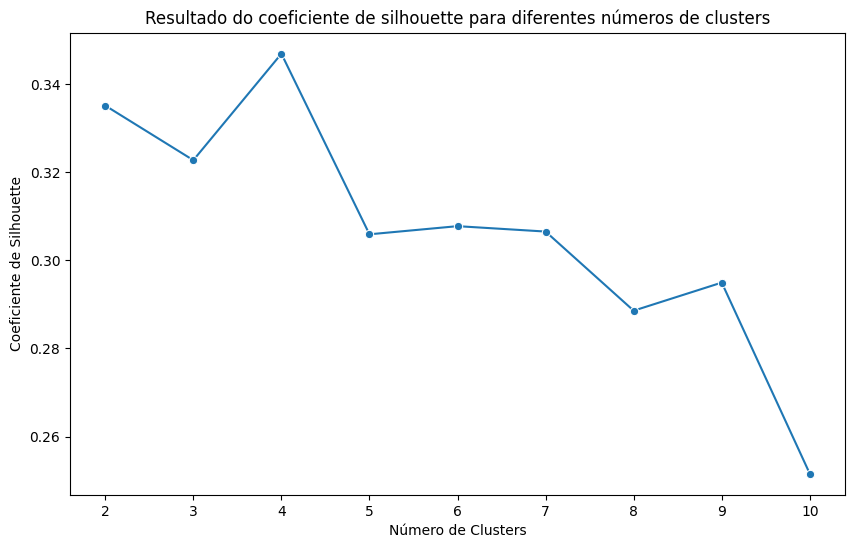

In [ ]:
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, init = 'k-means++')
    kmeans.fit(df_pca)
    silhouettescore = silhouette_score(df_pca, kmeans.labels_)
    silhouette.append(silhouettescore)

plt.figure(figsize=(10,6))
sns.lineplot(x = range(2, 11), y = silhouette, marker='o')
plt.title('Resultado do coeficiente de silhouette para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, n_init = 10, init = 'random', max_iter = 300)

kmeans_pca.fit(df_pca)

KMeans(init='random', n_clusters=4, n_init=10)

In [ ]:
df_pca['cluster'] = kmeans_pca.labels_
df_pca.head()

Componente 1  Componente 2  Componente 3  Componente 4  Componente 5  \
0     -0.173701     -0.431485     -0.847628      0.950447      0.290318   
1      1.599631      1.364964     -1.122228     -0.424421     -1.093285   
2      0.890024      0.345177     -0.215372     -0.577611     -1.005653   
3     -0.418501      0.071927      0.149307     -0.555307     -0.090027   
4      0.369221      1.481084     -0.277193     -0.902825     -0.750882   

   cluster  
0        3  
1        3  
2        1  
3        1  
4        1

In [ ]:
df_result = pd.concat([df.drop(columns = 'id_unico_cliente', axis = 1), pd.DataFrame(df_pca)], axis = 1)
df_result.head()

total_compras  tempo_medio_entrega  valor_medio_frete  \
0            1.0                  8.0              21.88   
1            1.0                 16.0              46.48   
2            1.0                 26.0              17.79   
3            1.0                 14.0              23.36   
4            1.0                 11.0              22.25   

   dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
0                     474.0       146.87                    4.0   
1                     233.0       335.48                    5.0   
2                     106.0       157.73                    5.0   
3                     173.0       173.30                    5.0   
4                      35.0       252.25                    5.0   

   media_parcelas  Componente 1  Componente 2  Componente 3  Componente 4  \
0             2.0     -0.173701     -0.431485     -0.847628      0.950447   
1             8.0      1.599631      1.364964     -1.122228     -0.424421   
2             7.0      0.890024      0.345177     -0.215372     -0.577611   
3             1.0     -0.418501      0.071927      0.149307     -0.555307   
4             8.0      0.369221      1.481084     -0.277193     -0.902825   

   Componente 5  cluster  
0      0.290318      3.0  
1     -1.093285      3.0  
2     -1.005653      1.0  
3     -0.090027      1.0  
4     -0.750882      1.0

In [ ]:
df_gp_pca = df_result.groupby("cluster").mean()
df_gp_pca

total_compras  tempo_medio_entrega  valor_medio_frete  \
cluster                                                          
0.0           1.057349            12.015174          20.448254   
1.0           1.037692            12.120675          20.296251   
2.0           1.042845            11.821020          20.102530   
3.0           1.040101            12.021232          20.152276   

         dias_desde_ultima_compra  total_gasto  media_pontuacao_score  \
cluster                                                                 
0.0                    242.200085   241.126194               4.091815   
1.0                    242.706276   217.574931               4.102146   
2.0                    240.752659   208.137613               4.123767   
3.0                    242.257455   211.644696               4.094003   

         media_parcelas  Componente 1  Componente 2  Componente 3  \
cluster                                                             
0.0            2.953497      0.427479      1.705468      3.484058   
1.0            2.901684     -0.596911      0.279901      0.222089   
2.0            2.889431      1.685382     -0.937546      0.400969   
3.0            2.898555     -0.076860     -0.062187     -0.848372   

         Componente 4  Componente 5  
cluster                              
0.0          2.981267     -1.535377  
1.0         -0.577758      0.034640  
2.0         -0.367578      0.130784  
3.0          0.740931      0.023423

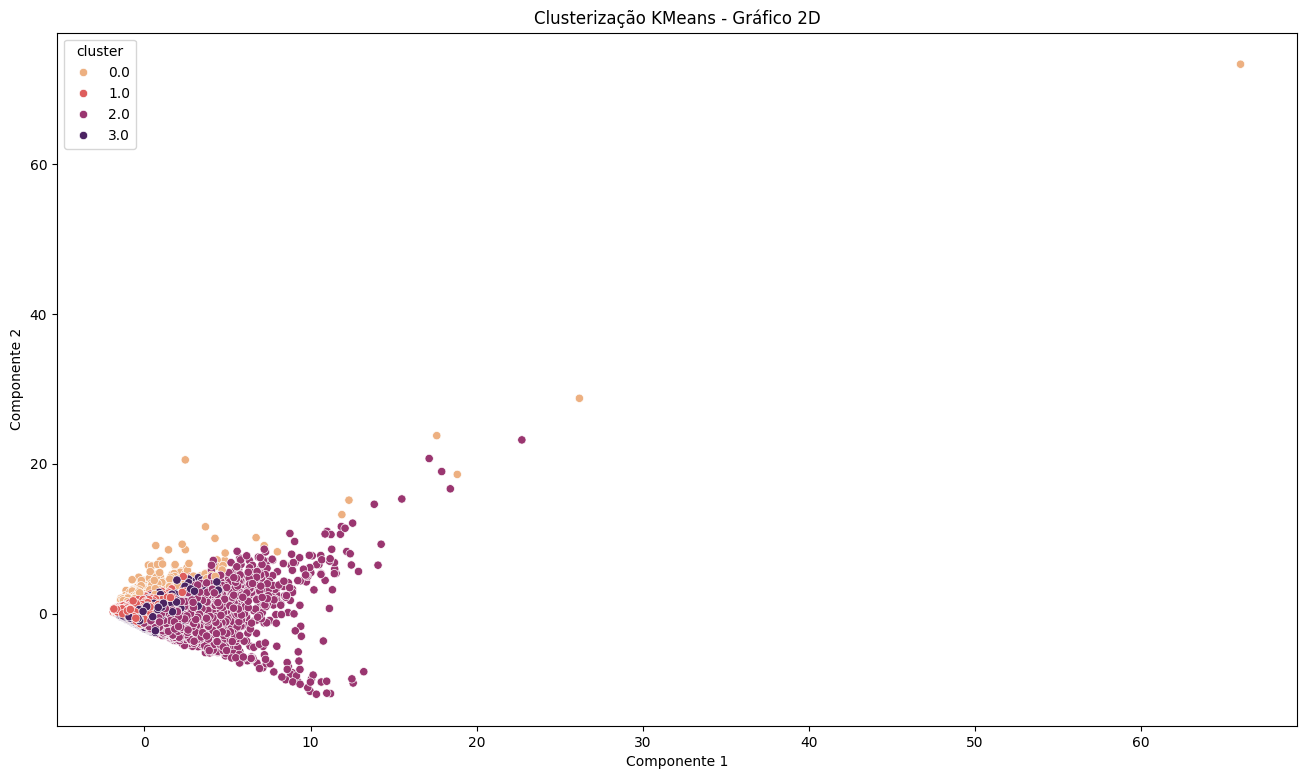

In [ ]:
# Gráfico 2D

plt.figure(figsize=(16,9))
sns.scatterplot(data = df_result, x = 'Componente 1', y = 'Componente 2', hue = 'cluster', palette = 'flare')

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title("Clusterização KMeans - Gráfico 2D")
plt.show()

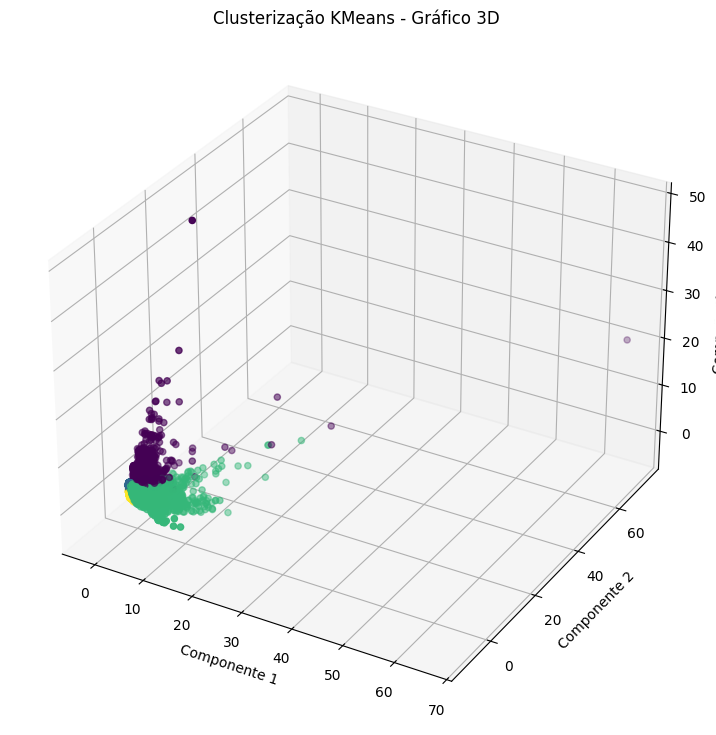

In [ ]:
# Gráfico 3D

fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_result['Componente 1'], df_result['Componente 2'], df_result['Componente 3'], c = df_result['cluster'])
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel('Componente 3')
plt.title('Clusterização KMeans - Gráfico 3D')
plt.show()

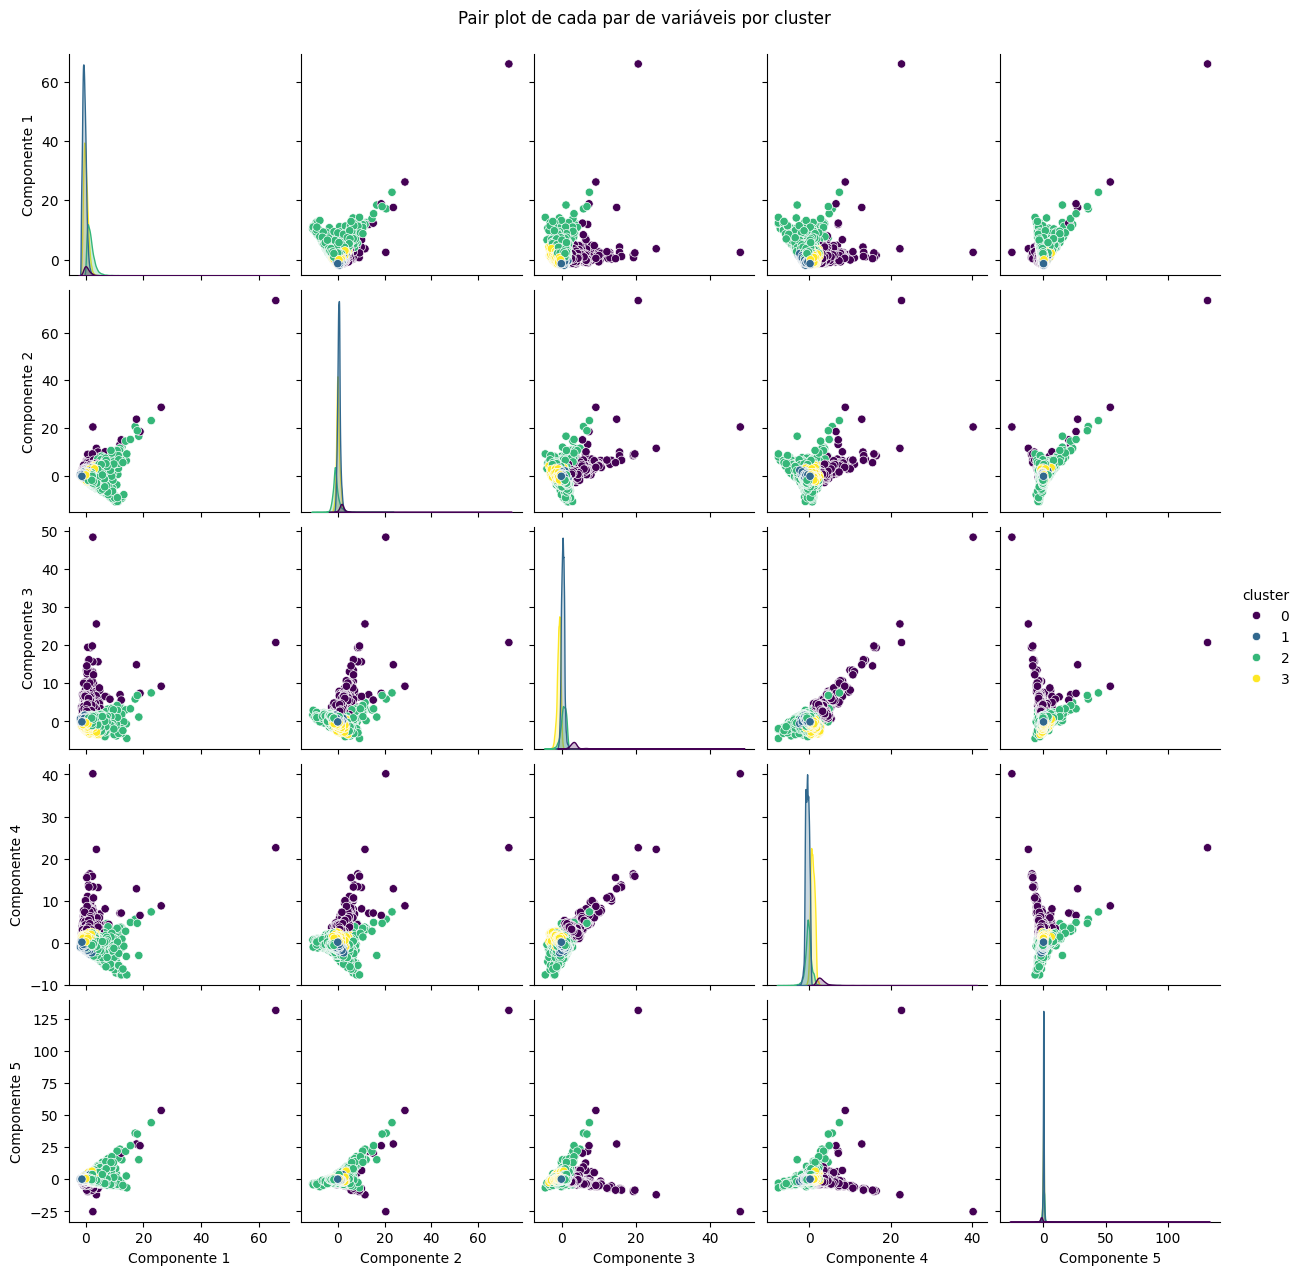

In [ ]:
# Gráfico de pairplot

sns.pairplot(df_pca, hue = 'cluster', palette = 'viridis')
plt.suptitle('Pair plot de cada par de variáveis por cluster', y=1.02)
plt.show()

#### Cluster com DBSCAN

#### Definição do epsilon

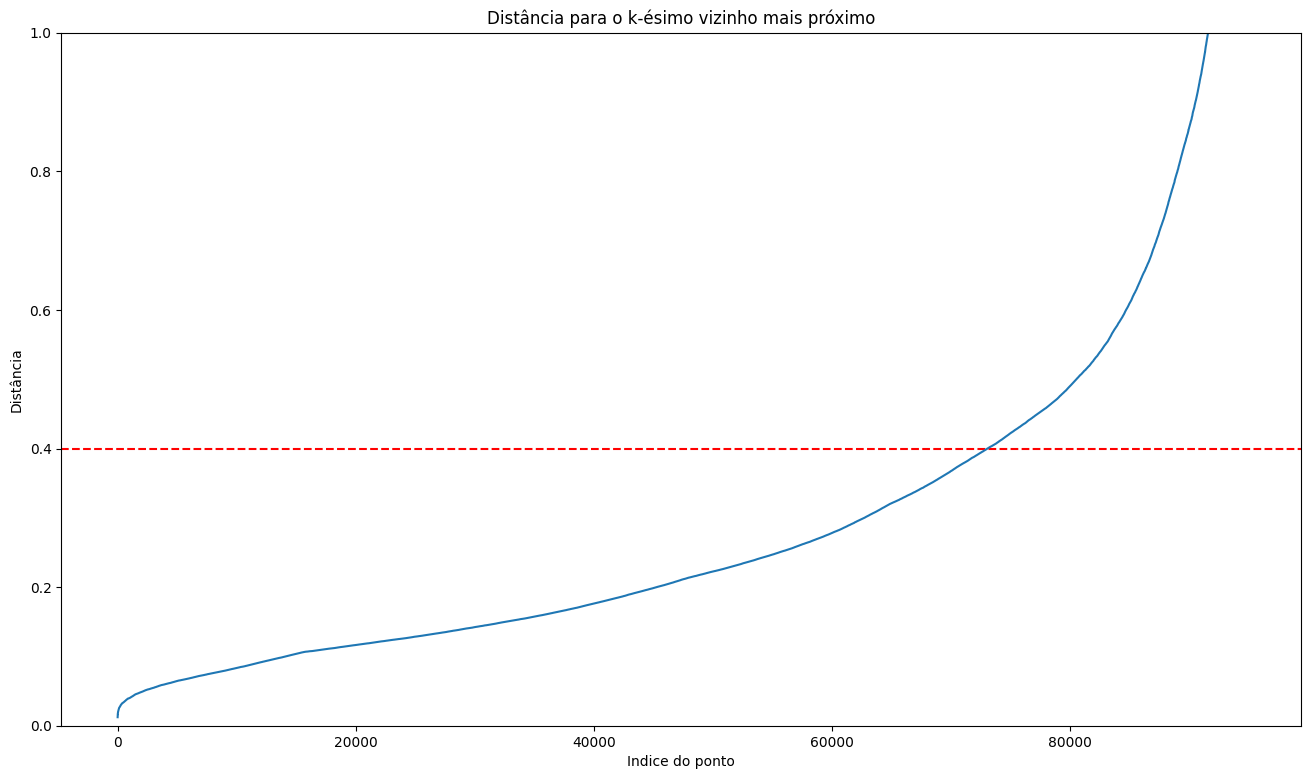

In [ ]:
k = 8
neigh = NearestNeighbors(n_neighbors = k)
nbrs = neigh.fit(scaled_features)
distancias, indices = nbrs.kneighbors(scaled_features)

distancias = np.sort(distancias, axis=0)
distancias = distancias[:, k-1]

plt.figure(figsize=(16,9))
plt.axhline(y=0.4, color='r', linestyle='--')
plt.ylim(0, 1)
plt.plot(distancias)
plt.title("Distância para o k-ésimo vizinho mais próximo")
plt.xlabel("Indice do ponto")
plt.ylabel("Distância")
plt.show()

#### Modelando

In [ ]:
df_DBSCAN = df.copy()

eps_val = 0.4
min_samples_val = 8

clustering = DBSCAN(eps = eps_val, min_samples = min_samples_val).fit(scaled_features)
df_DBSCAN['cluster'] = clustering.labels_

df_DBSCAN.head()

id_unico_cliente  total_compras  tempo_medio_entrega  \
0  861eff4711a542e4b93843c6dd7febb0              1                  8.0   
1  290c77bc529b7ac935b93aa66c333dc3              1                 16.0   
2  060e732b5b29e8181a18229c7b0b2b5e              1                 26.0   
3  259dac757896d24d7702b9acbbff3f3c              1                 14.0   
4  345ecd01c38d18a9036ed96c73b8d066              1                 11.0   

   valor_medio_frete  dias_desde_ultima_compra  total_gasto  \
0              21.88                       474       146.87   
1              46.48                       233       335.48   
2              17.79                       106       157.73   
3              23.36                       173       173.30   
4              22.25                        35       252.25   

   media_pontuacao_score  media_parcelas  cluster  
0                    4.0             2.0        0  
1                    5.0             8.0       -1  
2                    5.0             7.0        0  
3                    5.0             1.0        0  
4                    5.0             8.0        0

In [ ]:
df_DBSCAN["cluster"].value_counts()

cluster
 0     63521
-1     16104
 4      6665
 1      5455
 3      1474
 2       629
 16       55
 17       53
 15       53
 9        48
 13       40
 19       37
 5        35
 12       34
 6        33
 11       33
 32       31
 7        26
 20       24
 41       19
 37       18
 21       17
 25       16
 14       15
 26       13
 34       13
 18       12
 10       11
 33       11
 43       11
 30       11
 31       11
 40       11
 27       10
 24        9
 23        9
 48        9
 45        9
 8         9
 36        9
 51        8
 52        8
 53        8
 47        8
 38        8
 55        8
 29        8
 54        8
 39        7
 44        7
 49        7
 22        7
 28        6
 50        6
 46        5
 35        5
 42        3
Name: count, dtype: int64

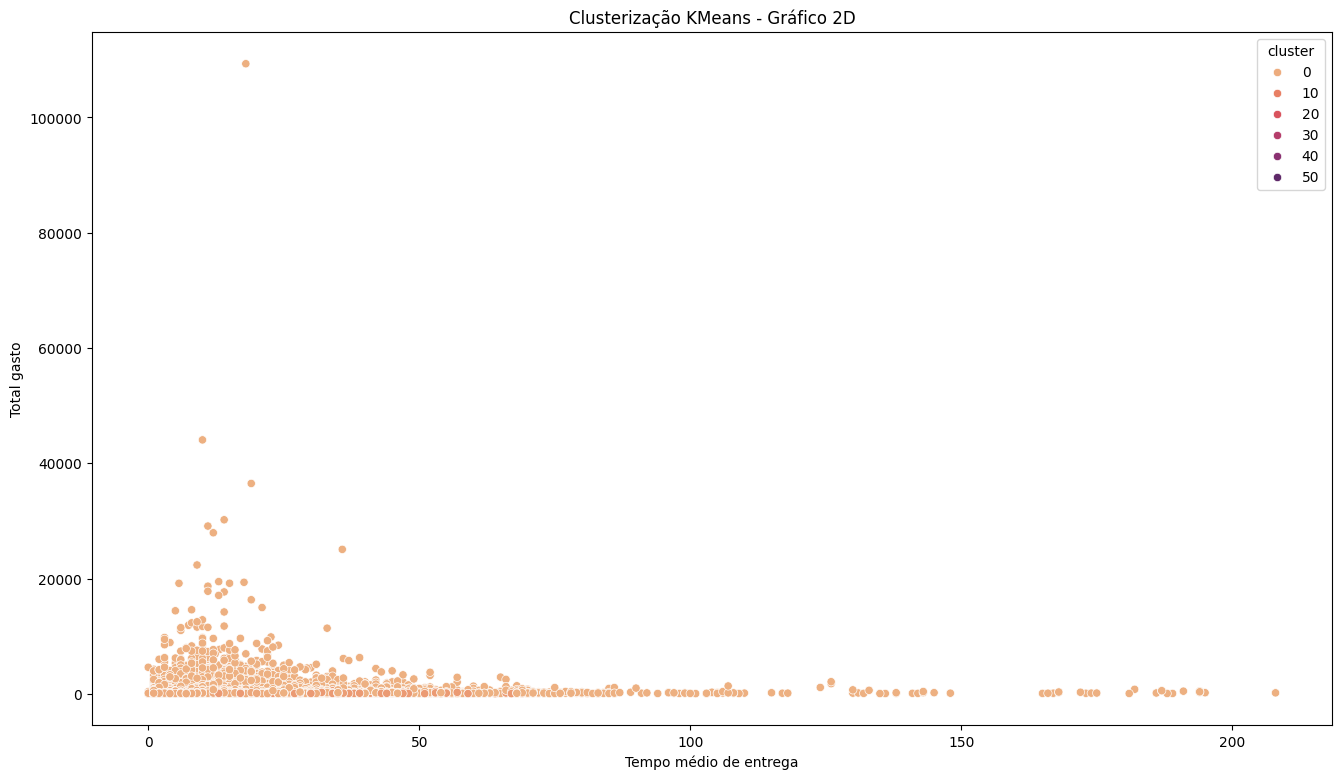

In [ ]:
# Gráfico 2D

plt.figure(figsize=(16,9))
sns.scatterplot(data = df_DBSCAN, x = 'tempo_medio_entrega', y = 'total_gasto', hue = 'cluster', palette = 'flare')

plt.xlabel('Tempo médio de entrega')
plt.ylabel('Total gasto')
plt.title("Clusterização KMeans - Gráfico 2D")
plt.show()

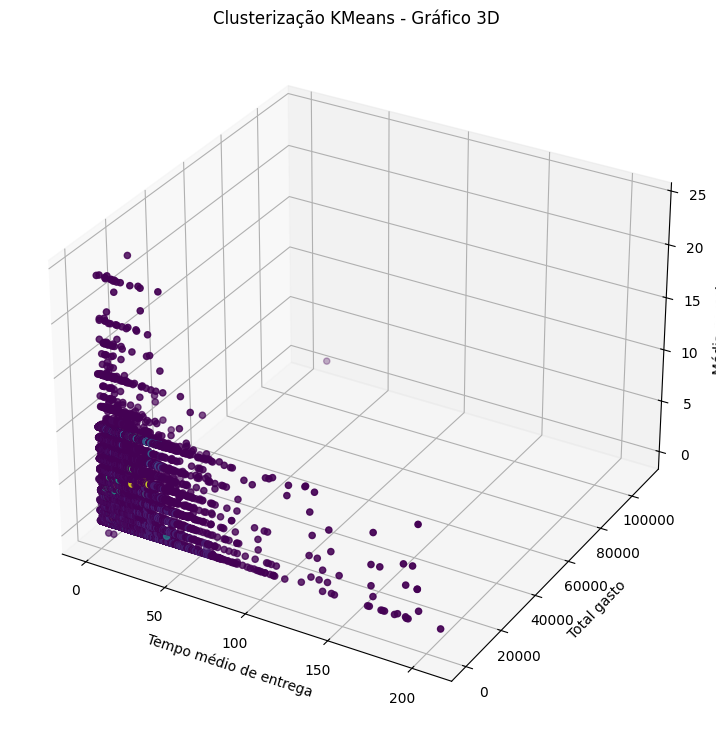

In [ ]:
# Gráfico 3D

fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_DBSCAN['tempo_medio_entrega'], df_DBSCAN['total_gasto'], df_DBSCAN['media_parcelas'], c = df_DBSCAN['cluster'])
ax.set_xlabel("Tempo médio de entrega")
ax.set_ylabel("Total gasto")
ax.set_zlabel('Média parcelas')
plt.title('Clusterização KMeans - Gráfico 3D')
plt.show()

#### Quem são os outliers

In [ ]:
df_DBSCAN[df_DBSCAN["cluster"] == -1]

id_unico_cliente  total_compras  tempo_medio_entrega  \
1       290c77bc529b7ac935b93aa66c333dc3              1                 16.0   
5       4c93744516667ad3b8f1fb645a3116a4              2                 11.5   
13      295c05e81917928d76245e842748184d              2                  6.5   
18      3e6fd6b2f0d499456a6a6820a40f2d79              1                 30.0   
29      4d221875624017bc47b4d1ce7314a5b7              1                 12.0   
...                                  ...            ...                  ...   
117272  c6f8e1db66045b7e49203b47b5ce816f              1                 23.0   
117291  c64ede6d0ae8901b1b6fb03528c1b7e6              1                 28.0   
117293  522e244a96d13876c5bac4985a8d5075              1                 45.0   
117315  82d46759af0369aad49084bacf85a6c3              1                 35.0   
117327  73c2643a0a458b49f58cea58833b192e              1                 12.0   

        valor_medio_frete  dias_desde_ultima_compra  total_gasto  \
1                  46.480                       233       335.48   
5                  29.680                       322       565.88   
13                 16.265                        88       281.50   
18                 25.630                       305        54.62   
29                 15.130                       282        69.12   
...                   ...                       ...          ...   
117272             11.380                       292       543.45   
117291             54.110                       269       304.11   
117293             30.400                       215      3974.04   
117315             31.930                       292       199.92   
117327             22.070                       303       711.07   

        media_pontuacao_score  media_parcelas  cluster  
1                         5.0             8.0       -1  
5                         5.0             1.0       -1  
13                        4.0             6.5       -1  
18                        4.0             5.0       -1  
29                        2.0             6.0       -1  
...                       ...             ...      ...  
117272                    1.0             2.0       -1  
117291                    4.0             4.0       -1  
117293                    1.0             6.0       -1  
117315                    1.0             3.0       -1  
117327                    5.0             2.0       -1  

[16104 rows x 9 columns]

#### Comparando outliers com não outliers

In [ ]:
# Identificando os outliers
df_DBSCAN_outliers = df_DBSCAN[df_DBSCAN["cluster"] == -1]

# Identificando os não outliers
df_DBSCAN_sem_outliers = df_DBSCAN[df_DBSCAN["cluster"] != -1]

In [ ]:
# Resumo estatístico para os outliers
metricas_outliers = df_DBSCAN_outliers.describe()

# Resumo estatístico para os não outliers
metricas_sem_outliers = df_DBSCAN_sem_outliers.describe()

In [ ]:
# Exibindo as métricas para o cluster dos outliers
metricas_outliers

total_compras  tempo_medio_entrega  valor_medio_frete  \
count   16104.000000         16104.000000       16104.000000   
mean        1.150646            18.284143          36.361539   
std         0.442182            15.158202          29.768936   
min         1.000000             0.000000           0.000000   
25%         1.000000             9.000000          17.630000   
50%         1.000000            14.000000          27.240000   
75%         1.000000            24.000000          45.110000   
max        16.000000           208.000000         409.680000   

       dias_desde_ultima_compra    total_gasto  media_pontuacao_score  \
count              16104.000000   16104.000000           16104.000000   
mean                 261.008818     617.766343               3.368864   
std                  163.421127    1441.004446               1.540956   
min                    0.000000      18.620000               1.000000   
25%                  128.000000     166.297500               2.000000   
50%                  237.000000     321.575000               4.000000   
75%                  377.000000     698.147500               5.000000   
max                  728.000000  109312.640000               5.000000   

       media_parcelas  cluster  
count    16104.000000  16104.0  
mean         5.080061     -1.0  
std          3.427717      0.0  
min          1.000000     -1.0  
25%          2.000000     -1.0  
50%          5.000000     -1.0  
75%          8.000000     -1.0  
max         24.000000     -1.0

In [ ]:
# Exibindo as métricas para o cluster dos NÃO outliers

metricas_sem_outliers

total_compras  tempo_medio_entrega  valor_medio_frete  \
count   78616.000000         78616.000000       78616.000000   
mean        1.009794            10.734756          16.916934   
std         0.099892             7.005753           7.454690   
min         1.000000             0.000000           0.000000   
25%         1.000000             6.000000          12.800000   
50%         1.000000             9.000000          15.670000   
75%         1.000000            14.000000          18.920000   
max         3.000000            70.000000          90.920000   

       dias_desde_ultima_compra   total_gasto  media_pontuacao_score  \
count              78616.000000  78616.000000           78616.000000   
mean                 238.633662    130.246000               4.252468   
std                  150.695503    112.527267               1.225443   
min                    4.000000      9.590000               1.000000   
25%                  117.000000     57.680000               4.000000   
50%                  221.000000     96.960000               5.000000   
75%                  346.000000    162.717500               5.000000   
max                  699.000000   1203.210000               5.000000   

       media_parcelas       cluster  
count    78616.000000  78616.000000  
mean         2.455374      0.729165  
std          2.248245      2.949919  
min          0.000000      0.000000  
25%          1.000000      0.000000  
50%          1.000000      0.000000  
75%          3.000000      0.000000  
max         11.000000     55.000000

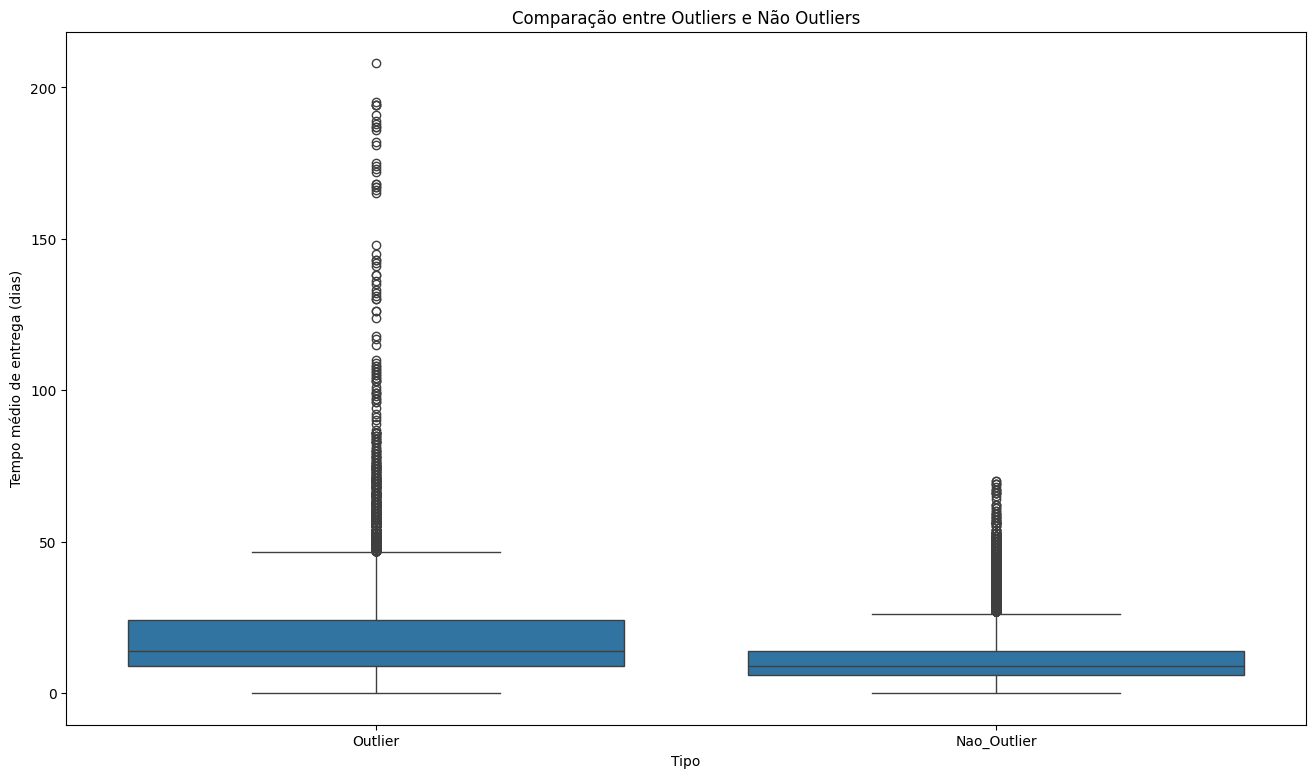

In [ ]:
df_DBSCAN_outliers['Tipo'] = "Outlier"
df_DBSCAN_sem_outliers['Tipo'] = "Nao_Outlier"

df_combined = pd.concat([df_DBSCAN_outliers, df_DBSCAN_sem_outliers])


plt.figure(figsize=(16,9))
sns.boxplot(data = df_combined, x = 'Tipo', y = 'tempo_medio_entrega')
plt.title("Comparação entre Outliers e Não Outliers")
plt.ylabel("Tempo médio de entrega (dias)")
plt.show()

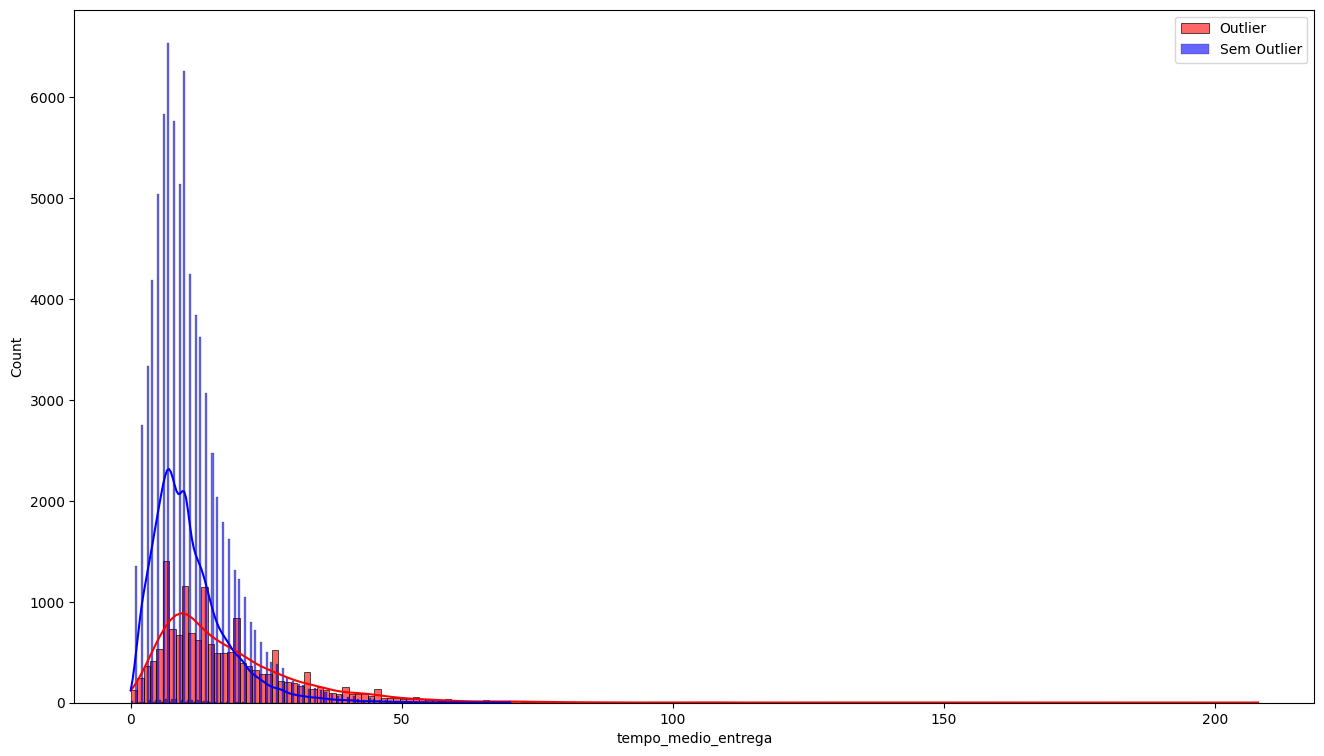

In [ ]:
plt.figure(figsize=(16,9))

sns.histplot(data = df_DBSCAN_outliers, x = 'tempo_medio_entrega', color = 'red', label = 'Outlier', kde = True, alpha = 0.6)
sns.histplot(data = df_DBSCAN_sem_outliers, x = 'tempo_medio_entrega', color = 'blue', label = 'Sem Outlier', kde = True, alpha = 0.6)

plt.legend()
plt.show()